In [1]:
from databaseCommunication import readDatabaseFile, createDataFrame_list
from dataframeFormating import createLabeledDataFrame_list #, N_polarized_pure3b, N_polarized, N_linear, getReducedDataframe, getReducedResults, 
from calculation import trapFrequency, getSubDF, noiseFilter, renameUnits, dropExcluded, computeBareTrapFrequencies, computeTrapFrequencies
from fit import fitDF, N_polarized_pure3b, N_polarized, N_linear, N_polarized_premix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from parameters import *

In [2]:
label_heads = ['experiment', "ODTFactor", 'latticeDetuning_real']


labels_inSitu = [[['inSitu', 4, np.nan], [162251, 162350]],
                 [['inSitu', 4, np.nan], [162352, 162407]],
                 [['inSitu', 4, np.nan], [162414, 162469]]
                ]   # June 10th


labels_TOF = [[['TOF', 4, -20], [169076, 169100]], # or [166259 / 166300, 166402] for having better measure (problem with the moving ROI)
              [['TOF', 4, -20], [169103, 169129]],
              [['TOF', 4, -20], [169130, 169180]],
              [['TOF', 4, -20], [169181, 169210]],
              [['TOF', 4, -20], [169211, 169240]],
              [['TOF', 4, -20], [169241, 169270]],
              [['TOF', 4, -20], [169284, 169314]],
              [['TOF', 4, -20], [169350, 169379]],
              [['TOF', 4, -20], [169380, 169410]],
              [['TOF', 4, -20], [169433, 169552]],
              [['TOF', 4, -20], [169564, 169627]],
              [['TOF', 4, -1], [169641, 169676]]
                ] # June 14th

# All is with 162 isotope
compz_not_lossy = 7.4
compz_lossy = 7.83

# All at -20 GHz (initially badly labeled to -30). ODT Factor = 4. ODT 1 = 1.44 ; ODT 2 = 1.36 ; ODT 3 = 0.38. Bz at 7.4


labels = [] 

excluded = [169261, 169262, 169287, 169322, 169667, 169668, 169669, 169670]

In [3]:
"""ciceroVariables = ['BECHoldTime', 'TOF', 'latticeDepth_final', 'latticeDetuning', 'compz_rotation', 'ODT3_Comp_final', 'dummy']
fitVariables = ['nCount', 'xWidth', 'yWidth', 'xPos', 'yPos']

df_TOF = createLabeledDataFrame_list(labels_TOF, label_heads, ciceroVariables, fitVariables)
for column in df_TOF.columns:
    try:
        df_TOF[column] = df_TOF[column].astype(float)
    except:
        pass
df_TOF['latticeDetuning'] = df_TOF['latticeDetuning_real']
df_TOF.to_pickle('data_save_210615.pickle')  """

"""df_inSitu = createLabeledDataFrame_list(labels_inSitu, label_heads, ciceroVariables, fitVariables)
for column in df_inSitu.columns:
    try:
        df_inSitu[column] = df_inSitu[column].astype(float)
    except:
        pass

df_inSitu.to_pickle('data_save_210610_inSitu.pickle')"""

"df_inSitu = createLabeledDataFrame_list(labels_inSitu, label_heads, ciceroVariables, fitVariables)\nfor column in df_inSitu.columns:\n    try:\n        df_inSitu[column] = df_inSitu[column].astype(float)\n    except:\n        pass\n\ndf_inSitu.to_pickle('data_save_210610_inSitu.pickle')"

In [4]:
df_TOF = pd.read_pickle('data_save_210615.pickle')
df_TOF = df_TOF[df_TOF['imageID'] < 169640]
#df_inSitu = pd.read_pickle('data_save_210604_inSitu.pickle')
df_inSitu = pd.read_pickle('data_save_210610_inSitu.pickle')

#### Noise filtering
#df_TOF = noiseFilter(df_TOF, nMax = np.inf, nMin = 4000, xWidthMax = np.inf, yWidthMax = 100)
#df_TOF =  noiseFilter(df_TOF, nMax = np.inf, nMin = 4000, xWidthMax = 100, xWidthMin = 4,  yWidthMax = 100, yWidthMin = 4)

#df_TOF =  noiseFilter(df_TOF, nMax = np.inf, nMin = 3000, xWidthMax = 100, xWidthMin = 3,  yWidthMax = 100, yWidthMin = 3)
#df_TOF =  noiseFilter(df_TOF, nMax = np.inf, nMin = 6000, xWidthMax = 300, xWidthMin = 3,  yWidthMax = 300, yWidthMin = 3)



# add units and renames columns
# it add xWidth_um and the inversion between X and Y is performed
renameUnits(df_TOF, magnification = 4.38, cameraPixelSize = 6.5, axis = 'horizontal', experiment = 'TOF')
renameUnits(df_inSitu, magnification = 6.66, cameraPixelSize = 6.5, axis = 'vertical', experiment = 'inSitu')

# Delete these row indexes from dataFrame
#dropExcluded(df_TOF, excluded)
dropExcluded(df_inSitu, excluded)

#wrongDetuningNames = pd.Index(np.where(df_inSitu['imageID'].isin(list(range(155465, 155534+1))))[0])
#df_inSitu.iloc[wrongDetuningNames, 3] = 20


In [5]:
getSubDF(df_TOF,['latticeDetuning_GHz', 'latticeDepth_mW', 'compz'], [-20, 60, 7.83])

,BECHoldTime,TOF,latticeDepth_mW,latticeDetuning_GHz,compz,ODT3_Comp_final,dummy,nCount,xWidth,yWidth,xPos,yPos,imageID,experiment,ODTFactor,latticeDetuning_real,xWidth_TOF_h_um,zWidth_TOF_h_um
0,60.0,6.0,60.0,-20.0,7.83,0.38,3.0,12974.0,36.379400,31.15230,1153.96,1003.500,169433.0,TOF,4.0,-20.0,46.230582,53.987694
1,200.0,6.0,60.0,-20.0,7.83,0.38,1.0,9860.0,1.051800,14.49260,1151.54,1002.000,169444.0,TOF,4.0,-20.0,21.507283,1.560890
2,0.0,6.0,60.0,-20.0,7.83,0.38,3.0,33397.0,33.429500,15.75220,1167.63,1005.950,169446.0,TOF,4.0,-20.0,23.376553,49.609989
3,40.0,6.0,60.0,-20.0,7.83,0.38,1.0,9750.0,30.807300,25.86770,1167.05,1010.170,169453.0,TOF,4.0,-20.0,38.388139,45.718596
4,60.0,6.0,60.0,-20.0,7.83,0.38,1.0,13585.0,314.746000,50.51430,1226.49,1030.740,169454.0,TOF,4.0,-20.0,74.964144,467.088813
5,100.0,6.0,60.0,-20.0,7.83,0.38,3.0,5928.0,1.274990,9.15217,1404.59,990.749,169457.0,TOF,4.0,-20.0,13.581987,1.892108
6,40.0,6.0,60.0,-20.0,7.83,0.38,3.0,13897.0,35.376200,51.95140,1166.54,1021.340,169463.0,TOF,4.0,-20.0,77.096826,52.498927
7,20.0,6.0,60.0,-20.0,7.83,0.38,3.0,16711.0,49.920600,27.56460,1169.93,1010.350,169472.0,TOF,4.0,-20.0,40.906370,74.083082
8,0.0,6.0,60.0,-20.0,7.83,0.38,1.0,30662.0,29.342000,15.94510,1167.04,1010.590,169475.0,TOF,4.0,-20.0,23.662820,43.544064
9,5.0,6.0,60.0,-20.0,7.83,0.38,3.0,21023.0,33.424000,30.13300,1167.49,1012.600,169484.0,TOF,4.0,-20.0,44.717922,49.601826


In [6]:
excluded = []
dropExcluded(df_TOF, excluded)

In [7]:
computeBareTrapFrequencies(df_TOF, trapFrequency_x, trapFrequency_y, trapFrequency_z, trapFrequency_x_blue, trapFrequency_y_blue)
computeBareTrapFrequencies(df_inSitu, trapFrequency_x, trapFrequency_y, trapFrequency_z, trapFrequency_x_blue, trapFrequency_y_blue)

computeTrapFrequencies(df_TOF)
computeTrapFrequencies(df_inSitu)

#temperature = 10*nK
#df_inSitu['rWidth_inSitu_v_um'] = np.sqrt(df_inSitu['xWidth_inSitu_v_um']*df_inSitu['yWidth_inSitu_v_um'])
#df_inSitu['rWidth_calculated_um'] = np.sqrt(k_B*temperature/(m*df_inSitu['trapFrequencyX_Hz']*df_inSitu['trapFrequencyY_Hz']))/um

In [8]:
df_TOF[(df_TOF['bareTrapFrequencyY_Hz'] < df_TOF['deconfiningTrapFrequency_Hz']) & (df_TOF['latticeDetuning_GHz'] > 0)]

,BECHoldTime,TOF,latticeDepth_mW,latticeDetuning_GHz,compz,ODT3_Comp_final,dummy,nCount,xWidth,yWidth,...,ODTFactor,latticeDetuning_real,xWidth_TOF_h_um,zWidth_TOF_h_um,trapFrequencyZ_kHz,deconfiningTrapFrequency_Hz,bareTrapFrequencyX_Hz,bareTrapFrequencyY_Hz,trapFrequencyX_Hz,trapFrequencyY_Hz


I computed that for a blue lattice $\omega_\perp^2 = \frac{\hbar k\sqrt{2V_{741}}}{m^{3/2}w_{741}^2} = \frac{\hbar k\sqrt{2\frac{m\omega_z^2}{2k^2}}}{m^{3/2}w_{741}^2} = \frac{\hbar\omega_z}{m w_{741}^2}$.

In [9]:
df_TOF.columns

Index(['BECHoldTime', 'TOF', 'latticeDepth_mW', 'latticeDetuning_GHz', 'compz',
       'ODT3_Comp_final', 'dummy', 'nCount', 'xWidth', 'yWidth', 'xPos',
       'yPos', 'imageID', 'experiment', 'ODTFactor', 'latticeDetuning_real',
       'xWidth_TOF_h_um', 'zWidth_TOF_h_um', 'trapFrequencyZ_kHz',
       'deconfiningTrapFrequency_Hz', 'bareTrapFrequencyX_Hz',
       'bareTrapFrequencyY_Hz', 'trapFrequencyX_Hz', 'trapFrequencyY_Hz'],
      dtype='object')

In [10]:
latticeDepthList = np.sort(df_inSitu['latticeDepth_mW'].unique())
BECHoldTimeList = np.sort(df_inSitu['BECHoldTime'].unique())
latticeDetuningList = np.sort(df_inSitu['latticeDetuning_GHz'].unique())
compzList = np.sort(df_inSitu['compz'].unique())
ODTFactorList = np.sort(df_inSitu['ODTFactor'].unique())
ODT3_Comp_finalList = np.sort(df_inSitu['ODT3_Comp_final'].unique())
trapFrequencyList = np.sort(df_inSitu['trapFrequencyZ_kHz'].unique())


"""latticeDepthList = np.sort(df['latticeDepth'].unique())
BECHoldTimeList = np.sort(df['BECHoldTime'].unique())
latticeDetuningList = np.sort(df['latticeDetuning'].unique())
compzList = np.sort(df['compz'].unique())
ODTFactorList = np.sort(df['ODTFactor'].unique())"""
colors = ['red', 'blue', 'orange', 'black', 'green', 'pink', 'purple']

In [11]:
latticeDepthList

array([  0.2,   0.5,   1. ,   5. ,  20. ,  60. , 120. ])

In [12]:
holdTime = 0
latticeDetuning = 1
df_hold = df_inSitu[df_inSitu['BECHoldTime'] == holdTime]
df_hold = df_hold[df_hold['latticeDetuning_GHz'] == latticeDetuning]

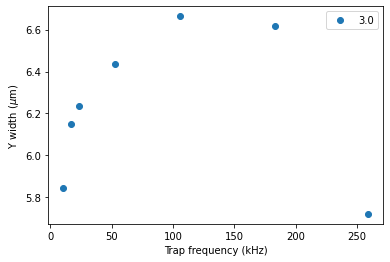

In [13]:
plt.figure()
for ODT3_Comp_final in ODT3_Comp_finalList:
    df_temp = df_hold[df_hold['ODT3_Comp_final'] == ODT3_Comp_final].groupby(['latticeDepth_mW']).mean()
    plt.plot(df_temp['trapFrequencyZ_kHz'], df_temp['yWidth_inSitu_v_um'], 'o', label = ODT3_Comp_final)
    #plt.plot(df_temp['trapFrequency'], df_temp['yWidth'], 'x', label = ODT3_Comp_final)
plt.xlabel("Trap frequency (kHz)")
plt.ylabel(r'Y width ($\mu$m)')
#plt.ylim(0,7)
plt.legend()
plt.show()

In [14]:
holdTime = 0
latticeDetuning = 20
df_hold = df_inSitu[df_inSitu['BECHoldTime'] == holdTime]

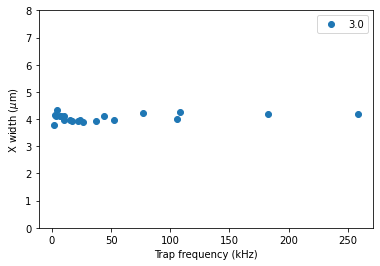

In [15]:
plt.figure()
for ODT3_Comp_final in ODT3_Comp_finalList:
    df_temp = df_hold[df_hold['ODT3_Comp_final'] == ODT3_Comp_final].groupby(['trapFrequencyZ_kHz']).mean().reset_index()
    plt.plot(df_temp['trapFrequencyZ_kHz'], df_temp['xWidth_inSitu_v_um'], 'o', label = ODT3_Comp_final)
    #plt.plot(df_temp['trapFrequency'], df_temp['yWidth'], 'x', label = ODT3_Comp_final)
plt.xlabel("Trap frequency (kHz)")
plt.ylabel(r'X width ($\mu$m)')
plt.ylim(0,8)
plt.legend()
plt.show()

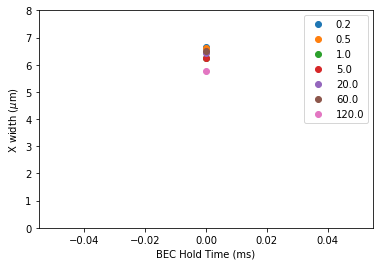

In [16]:
latticeDetuning = 5
ODT3_Comp_final = 3
plt.figure()
for latticeDepth in latticeDepthList:
    df_temp = getSubDF(df_inSitu, ['ODT3_Comp_final', 'latticeDetuning_GHz'], [ODT3_Comp_final, latticeDetuning])
    df_temp = df_temp[df_temp['latticeDepth_mW'] == latticeDepth].groupby(['trapFrequencyZ_kHz', 'BECHoldTime']).mean().reset_index()
    plt.plot(df_temp['BECHoldTime'], df_temp['yWidth_inSitu_v_um'], 'o', label = latticeDepth)
    #plt.plot(df_temp['trapFrequency'], df_temp['yWidth'], 'x', label = ODT3_Comp_final)
plt.ylabel(r'X width ($\mu$m)')
plt.xlabel(r'BEC Hold Time (ms)')
plt.ylim(0,8)
plt.legend()
plt.show()

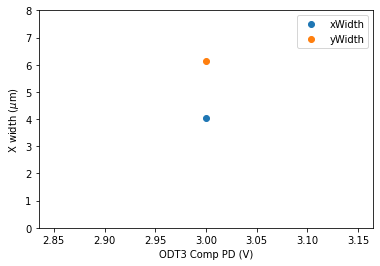

In [17]:
df_temp = df_inSitu.copy()
df_temp = df_temp.groupby(['ODT3_Comp_final']).mean().reset_index()

plt.figure()
plt.plot(df_temp['ODT3_Comp_final'], df_temp['xWidth_inSitu_v_um'], 'o', label = 'xWidth')
plt.plot(df_temp['ODT3_Comp_final'], df_temp['yWidth_inSitu_v_um'], 'o', label = 'yWidth')
plt.xlabel("ODT3 Comp PD (V)")
plt.ylabel(r'X width ($\mu$m)')
plt.legend()
plt.ylim(0,8)
plt.show()

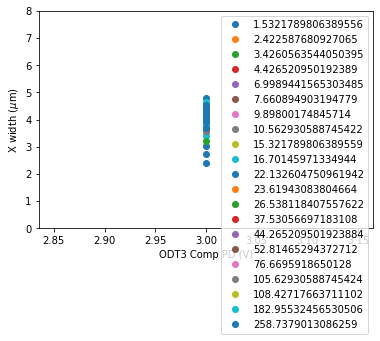

In [18]:
plt.figure()
for trapFrequency in trapFrequencyList:
    df_temp = getSubDF(df_inSitu, ['trapFrequencyZ_kHz'], [trapFrequency])
    df_temp.groupby(['dummy']).mean().reset_index()
    plt.plot(df_temp['ODT3_Comp_final'], df_temp['xWidth_inSitu_v_um'], 'o', label = trapFrequency)
    #plt.plot(df_temp['trapFrequency'], df_temp['yWidth'], 'x', label = ODT3_Comp_final)
plt.xlabel("ODT3 Comp PD (V)")
plt.ylabel(r'X width ($\mu$m)')
plt.ylim(0,8)
plt.legend()
plt.show()

<ipython-input-19-e1873cc93b64>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(X, Y, Z, vmin = 2, vmax = Z.mean()*1.2)


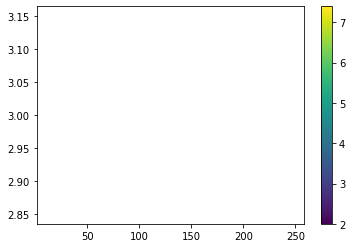

In [19]:
holdTime = 0
df_hold = getSubDF(df_inSitu, ['BECHoldTime'], [holdTime])
df_hold_color = df_hold.sort_values(['trapFrequencyZ_kHz', 'ODT3_Comp_final']).groupby(['trapFrequencyZ_kHz', 'ODT3_Comp_final']).mean()
x = np.array(trapFrequencyList)
y = np.array(ODT3_Comp_finalList)
z = np.array(df_hold_color['yWidth_inSitu_v_um'])

X, Y = np.meshgrid(x, y)
Z = z.reshape(len(y), len(x))

plt.pcolor(X, Y, Z, vmin = 2, vmax = Z.mean()*1.2)
plt.colorbar()
plt.show()

<ipython-input-20-de5b627e6a27>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(X, Y, Z, vmin = 2, vmax = Z.mean()*1.2)


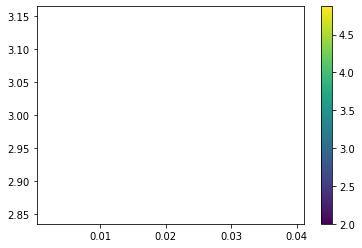

In [20]:
holdTime = 0
df_hold = df_inSitu[df_inSitu['BECHoldTime'] == holdTime]
df_hold_color = df_hold.sort_values(['trapFrequencyZ_kHz', 'ODT3_Comp_final']).groupby(['trapFrequencyZ_kHz', 'ODT3_Comp_final']).mean()
x = np.array(trapFrequencyList)/(2*np.pi*10**3)
y = np.array(ODT3_Comp_finalList)
z = np.array(df_hold_color['xWidth_inSitu_v_um'])

X, Y = np.meshgrid(x, y)
Z = z.reshape(len(y), len(x))

plt.pcolor(X, Y, Z, vmin = 2, vmax = Z.mean()*1.2)
plt.colorbar()
plt.show()

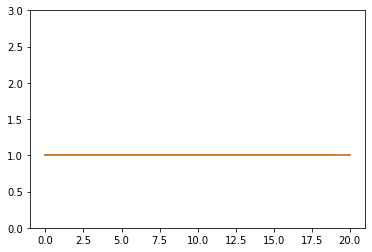

In [21]:
BECHoldTimeComp = 0
ODT3_Comp_final = 3
listRatio = []
plt.figure()
for latticeDetuning_GHz in latticeDetuningList:
    for latticeDepth_mW in latticeDepthList:
        df_temp = getSubDF(df_inSitu, ['latticeDetuning_GHz', 'latticeDepth_mW', 'ODT3_Comp_final'], [latticeDetuning_GHz, latticeDepth_mW, ODT3_Comp_final]).groupby(['BECHoldTime']).mean().reset_index()
        xInit = df_temp[df_temp['BECHoldTime'] == 0]['xWidth_inSitu_v_um'].mean()
        xFinal = df_temp[df_temp['BECHoldTime'] == BECHoldTimeComp]['xWidth_inSitu_v_um'].mean()
        listRatio += [xFinal/xInit]
        plt.plot([1]*len(listRatio))
plt.ylim(0, 3)
plt.plot(listRatio)

In [22]:
df_TOF

,BECHoldTime,TOF,latticeDepth_mW,latticeDetuning_GHz,compz,ODT3_Comp_final,dummy,nCount,xWidth,yWidth,...,ODTFactor,latticeDetuning_real,xWidth_TOF_h_um,zWidth_TOF_h_um,trapFrequencyZ_kHz,deconfiningTrapFrequency_Hz,bareTrapFrequencyX_Hz,bareTrapFrequencyY_Hz,trapFrequencyX_Hz,trapFrequencyY_Hz
0,20.0,3.0,120.0,-20.0,7.40,3.00,3.0,29159.0,21.8035,14.3949,...,4.0,-20.0,21.362295,32.356792,74.094957,79.163732,140.0,56.0,478.323175,460.791775
1,20.0,3.0,120.0,-20.0,7.40,3.00,2.0,28772.0,20.1178,16.7456,...,4.0,-20.0,24.850776,29.855183,74.094957,79.163732,140.0,56.0,478.323175,460.791775
2,100.0,3.0,120.0,-20.0,7.40,3.00,2.0,26539.0,23.1791,19.0429,...,4.0,-20.0,28.260011,34.398208,74.094957,79.163732,140.0,56.0,478.323175,460.791775
3,50.0,3.0,120.0,-20.0,7.40,3.00,1.0,27853.0,22.1837,16.5498,...,4.0,-20.0,24.560205,32.921016,74.094957,79.163732,140.0,56.0,478.323175,460.791775
4,20.0,3.0,120.0,-20.0,7.40,3.00,1.0,28241.0,21.4783,18.0636,...,4.0,-20.0,26.806712,31.874189,74.094957,79.163732,140.0,56.0,478.323175,460.791775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,10.0,8.0,0.2,-20.0,7.83,0.38,3.0,22804.0,18.1749,18.3741,...,4.0,-20.0,27.267500,26.971884,3.024914,15.995155,140.0,56.0,141.239708,59.030967
465,500.0,8.0,0.2,-20.0,7.83,0.38,1.0,5749.0,28.3868,22.8800,...,4.0,-20.0,33.954338,42.126530,3.024914,15.995155,140.0,56.0,141.239708,59.030967
466,10.0,8.0,0.2,-20.0,7.83,0.38,1.0,22120.0,21.2320,20.0990,...,4.0,-20.0,29.827283,31.508676,3.024914,15.995155,140.0,56.0,141.239708,59.030967
467,10.0,8.0,1.0,-20.0,7.83,0.38,1.0,20440.0,20.1804,16.3460,...,4.0,-20.0,24.257763,29.948082,6.763913,23.918335,140.0,56.0,146.093379,69.851811


In [23]:
df_TOF2 = getSubDF(df_TOF, ['latticeDepth_mW', 'latticeDetuning_GHz'], [0.2, 20])

df_TOF2[['latticeDepth_mW', 'latticeDetuning_GHz', 'ODTFactor', 'trapFrequencyX_Hz', 'trapFrequencyY_Hz']]

,latticeDepth_mW,latticeDetuning_GHz,ODTFactor,trapFrequencyX_Hz,trapFrequencyY_Hz


In [24]:
# This is where we choose the different parameter to use from the inSitu measurement

ODT3_Comp_final = 3
BECHoldTime = 0

df_inSitu_mean = getSubDF(df_inSitu, ['BECHoldTime', 'ODT3_Comp_final'], [BECHoldTime, ODT3_Comp_final]).groupby(['latticeDetuning_GHz', 'latticeDepth_mW']).mean().reset_index()
df = pd.merge(df_TOF, df_inSitu_mean, how="outer", on=["latticeDetuning_GHz", "latticeDepth_mW"], suffixes=('', '_y'))#, validate="many_to_many")
df.drop(df.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
#df3.drop_duplicates(cols=['imageID', 'xWidth'],inplace=True)
df.columns

Index(['BECHoldTime', 'TOF', 'latticeDepth_mW', 'latticeDetuning_GHz', 'compz',
       'ODT3_Comp_final', 'dummy', 'nCount', 'xWidth', 'yWidth', 'xPos',
       'yPos', 'imageID', 'experiment', 'ODTFactor', 'latticeDetuning_real',
       'xWidth_TOF_h_um', 'zWidth_TOF_h_um', 'trapFrequencyZ_kHz',
       'deconfiningTrapFrequency_Hz', 'bareTrapFrequencyX_Hz',
       'bareTrapFrequencyY_Hz', 'trapFrequencyX_Hz', 'trapFrequencyY_Hz',
       'xWidth_inSitu_v_um', 'yWidth_inSitu_v_um'],
      dtype='object')

In [25]:
#df_TOF.head()
#df_inSitu_mean.head()
df[df['latticeDetuning_GHz'] == -5]['latticeDepth_mW'].unique()

array([], dtype=float64)

# Old stuff

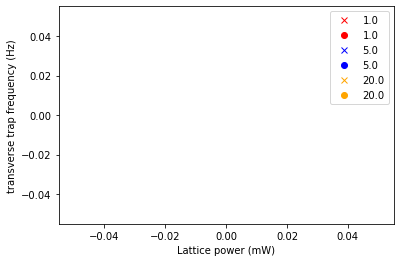

In [26]:
plt.figure()
i = 0
for latticeDetuning in latticeDetuningList:
    df_temp = getSubDF(df, ['latticeDetuning_GHz'], [latticeDetuning])
    plt.plot(df_temp['latticeDepth_mW'], df_temp['deconfiningTrapFrequency_Hz'], 'x', color = colors[i], label = latticeDetuning)
    plt.plot(df_temp['latticeDepth_mW'], df_temp['trapFrequencyX_Hz'], 'o', color = colors[i], label = latticeDetuning)
    i += 1
plt.legend()
plt.xlabel('Lattice power (mW)')
plt.ylabel('transverse trap frequency (Hz)')
plt.show()

In [27]:
getSubDF(df, ['latticeDetuning_GHz', 'compz', 'ODTFactor'], [-5, 7.72, 4])

,BECHoldTime,TOF,latticeDepth_mW,latticeDetuning_GHz,compz,ODT3_Comp_final,dummy,nCount,xWidth,yWidth,...,xWidth_TOF_h_um,zWidth_TOF_h_um,trapFrequencyZ_kHz,deconfiningTrapFrequency_Hz,bareTrapFrequencyX_Hz,bareTrapFrequencyY_Hz,trapFrequencyX_Hz,trapFrequencyY_Hz,xWidth_inSitu_v_um,yWidth_inSitu_v_um


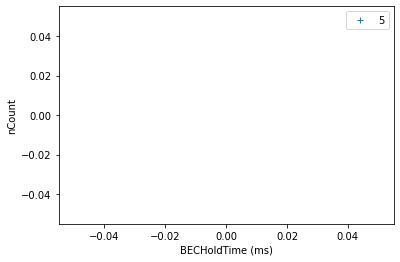

In [28]:
latticeDetuning = -5
compz = 7.4
ODTFactor = 4
plt.figure()
for latticeDepth in [5]:#, 20, 120]:
    for ODTFactor in [4]:
        df_temp = getSubDF(df, ['latticeDepth_mW', 'latticeDetuning_GHz', 'compz', 'ODTFactor'], [latticeDepth, latticeDetuning, compz, ODTFactor])
        plt.plot(df_temp['BECHoldTime'], df_temp['nCount'], '+', label = str(round(latticeDepth, 2)))
plt.legend()
#plt.ylim(0, 5000)
#plt.ylim(0,50000)
plt.xlabel('BECHoldTime (ms)')
plt.ylabel('nCount')
plt.show()

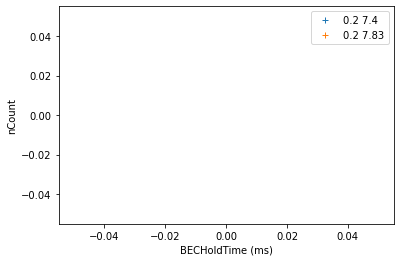

In [29]:
latticeDetuning = -30
plt.figure()
for latticeDepth in [0.2]:#, 20, 120]:
    df_temp_1 = getSubDF(df, ['latticeDepth_mW', 'latticeDetuning_GHz', 'compz'], [latticeDepth, latticeDetuning, compz_not_lossy])
    df_temp_2 = getSubDF(df, ['latticeDepth_mW', 'latticeDetuning_GHz', 'compz'], [latticeDepth, latticeDetuning, compz_lossy])
    plt.plot(df_temp_1['BECHoldTime'], df_temp_1['nCount'], '+', label = str(round(latticeDepth, 2)) + ' ' +str(compz_not_lossy))
    plt.plot(df_temp_2['BECHoldTime'], df_temp_2['nCount'], '+', label = str(round(latticeDepth, 2)) + ' ' +str(compz_lossy))
plt.legend()
#plt.ylim(0, 5000)
#plt.xlim(0,10)
plt.xlabel('BECHoldTime (ms)')
plt.ylabel('nCount')
plt.show()

In [30]:
df_TOF

,BECHoldTime,TOF,latticeDepth_mW,latticeDetuning_GHz,compz,ODT3_Comp_final,dummy,nCount,xWidth,yWidth,...,ODTFactor,latticeDetuning_real,xWidth_TOF_h_um,zWidth_TOF_h_um,trapFrequencyZ_kHz,deconfiningTrapFrequency_Hz,bareTrapFrequencyX_Hz,bareTrapFrequencyY_Hz,trapFrequencyX_Hz,trapFrequencyY_Hz
0,20.0,3.0,120.0,-20.0,7.40,3.00,3.0,29159.0,21.8035,14.3949,...,4.0,-20.0,21.362295,32.356792,74.094957,79.163732,140.0,56.0,478.323175,460.791775
1,20.0,3.0,120.0,-20.0,7.40,3.00,2.0,28772.0,20.1178,16.7456,...,4.0,-20.0,24.850776,29.855183,74.094957,79.163732,140.0,56.0,478.323175,460.791775
2,100.0,3.0,120.0,-20.0,7.40,3.00,2.0,26539.0,23.1791,19.0429,...,4.0,-20.0,28.260011,34.398208,74.094957,79.163732,140.0,56.0,478.323175,460.791775
3,50.0,3.0,120.0,-20.0,7.40,3.00,1.0,27853.0,22.1837,16.5498,...,4.0,-20.0,24.560205,32.921016,74.094957,79.163732,140.0,56.0,478.323175,460.791775
4,20.0,3.0,120.0,-20.0,7.40,3.00,1.0,28241.0,21.4783,18.0636,...,4.0,-20.0,26.806712,31.874189,74.094957,79.163732,140.0,56.0,478.323175,460.791775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,10.0,8.0,0.2,-20.0,7.83,0.38,3.0,22804.0,18.1749,18.3741,...,4.0,-20.0,27.267500,26.971884,3.024914,15.995155,140.0,56.0,141.239708,59.030967
465,500.0,8.0,0.2,-20.0,7.83,0.38,1.0,5749.0,28.3868,22.8800,...,4.0,-20.0,33.954338,42.126530,3.024914,15.995155,140.0,56.0,141.239708,59.030967
466,10.0,8.0,0.2,-20.0,7.83,0.38,1.0,22120.0,21.2320,20.0990,...,4.0,-20.0,29.827283,31.508676,3.024914,15.995155,140.0,56.0,141.239708,59.030967
467,10.0,8.0,1.0,-20.0,7.83,0.38,1.0,20440.0,20.1804,16.3460,...,4.0,-20.0,24.257763,29.948082,6.763913,23.918335,140.0,56.0,146.093379,69.851811


In [31]:
N_polarized_premix(10, 100, 1)

def fitRun_pure(df_run):
    N0_guess = max(df_run['nCount'])
    time_guess = max(df_run['BECHoldTime'])
    popt, pcov = curve_fit(N_polarized_pure3b, df_run['BECHoldTime'], df_run['nCount'],
                       p0 = [N0_guess, 1/(N0_guess**2*time_guess)],
                          )#bounds = ((0, 0), (np.inf, np.inf)),
                           #method = 'trf'
                      #)
    return popt, pcov
def fitRun_pure_premix(df_run):
    N0_guess = max(df_run['nCount'])
    time_guess = max(df_run['BECHoldTime'])
    popt, pcov = curve_fit(N_polarized_premix, df_run['BECHoldTime'], df_run['nCount'],
                       p0 = [N0_guess, 1/(N0_guess**2*time_guess)],
                          )#bounds = ((0, 0), (np.inf, np.inf)),
                           #method = 'trf'
                      #)
    return popt, pcov
df_run = getSubDF(df, ['latticeDetuning_GHz', 'latticeDepth_mW', 'compz', 'ODTFactor'], [-20, 120, 7.4, 4])
fitRun_pure_premix(df_run)
#fitDF(df, ['latticeDetuning_GHz', 'latticeDepth_mW', 'compz', 'ODTFactor'], fitType = 'pure_premix')

(array([3.05916005e+04, 9.51952233e-13]),
 array([[6.41561937e+05, 7.65074640e-11],
        [7.65074640e-11, 3.66397988e-26]]))

In [32]:
resultsDF_pure = fitDF(df, ['latticeDetuning_GHz', 'latticeDepth_mW', 'compz', 'ODTFactor'], fitType = 'pure')
resultsDF_pure.drop(columns = ['BECHoldTime', 'xWidth', 'yWidth', 'imageID', 'dummy'], inplace = True)
resultsDF_pure['compz'] = resultsDF_pure['compz'].round(3)

resultsDF_pure_premix = fitDF(df, ['latticeDetuning_GHz', 'latticeDepth_mW', 'compz', 'ODTFactor'], fitType = 'pure_premix')
resultsDF_pure_premix.drop(columns = ['BECHoldTime', 'xWidth', 'yWidth', 'imageID', 'dummy'], inplace = True)
resultsDF_pure_premix['compz'] = resultsDF_pure['compz'].round(3)

resultsDF_mix = fitDF(df, ['latticeDetuning_GHz', 'latticeDepth_mW', 'compz', 'ODTFactor'], fitType = 'mix')
resultsDF_mix.drop(columns = ['BECHoldTime', 'xWidth', 'yWidth', 'imageID', 'dummy'], inplace = True)
resultsDF_mix['compz'] = resultsDF_mix['compz'].round(3)

resultsDF_lin = fitDF(df, ['latticeDetuning_GHz', 'latticeDepth_mW', 'compz', 'ODTFactor'], fitType = 'lin', tmax_ms = np.inf)
resultsDF_lin.drop(columns = ['BECHoldTime', 'xWidth', 'yWidth', 'imageID', 'dummy'], inplace = True)
resultsDF_lin['compz'] = resultsDF_lin['compz'].round(3)





"""def N_polarized(t, N0, alpha, gamma):
    return np.sqrt(alpha / (np.exp(2*alpha*t)*(alpha/(N0**2)+gamma)-gamma))

def N_linear(t, N0, b):
    return N0-b*t

def N_polarized_pure3b(t, N0, gamma):
    return N0 / np.sqrt(1+N0**2*gamma*t)"""


#print('\n')
#print(resultsDF)
#perr = np.sqrt(np.diag(pcov))

{'BECHoldTime': 1117.741935483871, 'TOF': 9.0, 'latticeDepth_mW': 0.20000000000000007, 'latticeDetuning_GHz': -20.0, 'compz': 7.400000000000002, 'ODT3_Comp_final': 3.0, 'dummy': 1.967741935483871, 'nCount': 25268.451612903227, 'xWidth': 36.19839741935483, 'yWidth': 32.69702764516129, 'xPos': 1022.6151612903226, 'yPos': 1017.7184516129032, 'imageID': 169395.0, 'ODTFactor': 4.0, 'latticeDetuning_real': -20.0, 'xWidth_TOF_h_um': 48.52298623140375, 'zWidth_TOF_h_um': 53.71908292826632, 'trapFrequencyZ_kHz': 3.0249139547776176, 'deconfiningTrapFrequency_Hz': 15.995154808721637, 'bareTrapFrequencyX_Hz': 140.0, 'bareTrapFrequencyY_Hz': 56.0, 'trapFrequencyX_Hz': 141.23970794219454, 'trapFrequencyY_Hz': 59.030967293416566, 'xWidth_inSitu_v_um': nan, 'yWidth_inSitu_v_um': nan}
{'BECHoldTime': 1155.0, 'TOF': 9.0, 'latticeDepth_mW': 0.5, 'latticeDetuning_GHz': -20.0, 'compz': 7.400000000000002, 'ODT3_Comp_final': 3.0, 'dummy': 2.0, 'nCount': 24505.533333333333, 'xWidth': 36.31423373333334, 'yWidt

'def N_polarized(t, N0, alpha, gamma):\n    return np.sqrt(alpha / (np.exp(2*alpha*t)*(alpha/(N0**2)+gamma)-gamma))\n\ndef N_linear(t, N0, b):\n    return N0-b*t\n\ndef N_polarized_pure3b(t, N0, gamma):\n    return N0 / np.sqrt(1+N0**2*gamma*t)'

In [33]:
resultsDF_pure_premix

,N0,alpha,gamma,b,TOF,latticeDepth_mW,latticeDetuning_GHz,compz,ODT3_Comp_final,nCount,...,xWidth_TOF_h_um,zWidth_TOF_h_um,trapFrequencyZ_kHz,deconfiningTrapFrequency_Hz,bareTrapFrequencyX_Hz,bareTrapFrequencyY_Hz,trapFrequencyX_Hz,trapFrequencyY_Hz,xWidth_inSitu_v_um,yWidth_inSitu_v_um
0,28276.396369,0.000056,7.632808e-14,NaN,9.0,0.2,-20.0,7.40,3.00,25268.451613,...,48.522986,53.719083,3.024914,15.995155,140.0,56.0,141.239708,59.030967,NaN,NaN
1,27189.824792,0.000056,6.303485e-14,NaN,9.0,0.5,-20.0,7.40,3.00,24505.533333,...,52.740688,53.890986,4.782809,20.112842,140.0,56.0,143.079131,63.305906,NaN,NaN
2,28024.434844,0.000056,7.322157e-14,NaN,7.0,1.0,-20.0,7.40,3.00,25113.000000,...,40.966432,40.887054,6.763913,23.918335,140.0,56.0,146.093379,69.851811,NaN,NaN
3,27296.389427,0.000056,8.415877e-14,NaN,5.0,2.0,-20.0,7.40,3.00,24266.666667,...,37.381748,45.474425,9.565618,28.443854,140.0,56.0,151.942591,81.379057,NaN,NaN
4,31907.515052,0.000056,8.308833e-14,NaN,5.0,5.0,-20.0,7.40,3.00,27900.400000,...,37.220162,36.555644,15.124570,35.766253,140.0,56.0,168.274708,108.868625,NaN,NaN
5,31250.119680,0.000056,1.185686e-13,NaN,5.0,10.0,-20.0,7.40,3.00,26726.400000,...,51.313780,37.823460,21.389372,42.533483,140.0,56.0,192.438964,143.418112,NaN,NaN
6,31277.871476,0.000056,1.386076e-13,NaN,5.0,20.0,-20.0,7.40,3.00,27856.019608,...,40.437429,39.335566,30.249140,50.581121,140.0,56.0,233.378469,194.939760,NaN,NaN
7,31630.237889,0.000056,8.497345e-13,NaN,5.0,60.0,-20.0,7.40,3.00,27732.333333,...,37.479942,43.359996,52.393047,66.568499,140.0,56.0,352.415280,328.226339,NaN,NaN
8,30591.600453,0.000056,9.519522e-13,NaN,3.0,120.0,-20.0,7.40,3.00,26877.600000,...,31.941505,33.972235,74.094957,79.163732,140.0,56.0,478.323175,460.791775,NaN,NaN
9,22533.781289,0.000056,1.008961e-11,NaN,8.0,0.2,-20.0,7.83,0.38,16241.454545,...,36.223941,36.417640,3.024914,15.995155,140.0,56.0,141.239708,59.030967,NaN,NaN


In [34]:
latticeDepth = 120
latticeDetuning = -20
compz = compz_not_lossy
ODTFactor = 4
df_tempZ = getSubDF(df, ['latticeDepth_mW', 'latticeDetuning_GHz', 'compz', 'ODTFactor'], [latticeDepth, latticeDetuning, compz, ODTFactor])
time = np.linspace(0, 3000, 10000)

In [35]:
df[df['imageID'] < 169100]

,BECHoldTime,TOF,latticeDepth_mW,latticeDetuning_GHz,compz,ODT3_Comp_final,dummy,nCount,xWidth,yWidth,...,xWidth_TOF_h_um,zWidth_TOF_h_um,trapFrequencyZ_kHz,deconfiningTrapFrequency_Hz,bareTrapFrequencyX_Hz,bareTrapFrequencyY_Hz,trapFrequencyX_Hz,trapFrequencyY_Hz,xWidth_inSitu_v_um,yWidth_inSitu_v_um
0,20.0,3.0,120.0,-20.0,7.4,3.0,3.0,29159.0,21.8035,14.3949,...,21.362295,32.356792,74.094957,79.163732,140.0,56.0,478.323175,460.791775,NaN,NaN
1,20.0,3.0,120.0,-20.0,7.4,3.0,2.0,28772.0,20.1178,16.7456,...,24.850776,29.855183,74.094957,79.163732,140.0,56.0,478.323175,460.791775,NaN,NaN
2,100.0,3.0,120.0,-20.0,7.4,3.0,2.0,26539.0,23.1791,19.0429,...,28.260011,34.398208,74.094957,79.163732,140.0,56.0,478.323175,460.791775,NaN,NaN
3,50.0,3.0,120.0,-20.0,7.4,3.0,1.0,27853.0,22.1837,16.5498,...,24.560205,32.921016,74.094957,79.163732,140.0,56.0,478.323175,460.791775,NaN,NaN
4,20.0,3.0,120.0,-20.0,7.4,3.0,1.0,28241.0,21.4783,18.0636,...,26.806712,31.874189,74.094957,79.163732,140.0,56.0,478.323175,460.791775,NaN,NaN
5,100.0,3.0,120.0,-20.0,7.4,3.0,1.0,26163.0,22.9631,19.3959,...,28.783870,34.077660,74.094957,79.163732,140.0,56.0,478.323175,460.791775,NaN,NaN
6,200.0,3.0,120.0,-20.0,7.4,3.0,3.0,25416.0,23.6358,20.3002,...,30.125868,35.075959,74.094957,79.163732,140.0,56.0,478.323175,460.791775,NaN,NaN
7,50.0,3.0,120.0,-20.0,7.4,3.0,3.0,30631.0,22.2723,18.5801,...,27.573208,33.052500,74.094957,79.163732,140.0,56.0,478.323175,460.791775,NaN,NaN
8,10.0,3.0,120.0,-20.0,7.4,3.0,1.0,26897.0,21.0162,18.2118,...,27.026644,31.188425,74.094957,79.163732,140.0,56.0,478.323175,460.791775,NaN,NaN
9,10.0,3.0,120.0,-20.0,7.4,3.0,2.0,33206.0,21.4769,18.4637,...,27.400468,31.872112,74.094957,79.163732,140.0,56.0,478.323175,460.791775,NaN,NaN


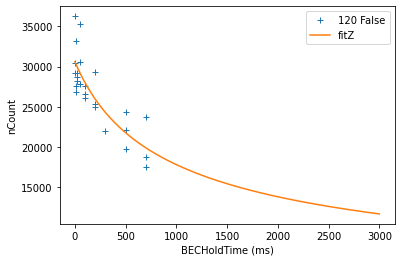

In [36]:
resultZ = getSubDF(resultsDF_pure, ['latticeDepth_mW', 'latticeDetuning_GHz', 'compz'], [latticeDepth, latticeDetuning, compz])

NZ, gammaZ = resultZ[['N0', 'gamma']].iloc[0,:]
Z = N_polarized_pure3b(time, NZ, gammaZ)

plt.figure()
plt.plot(df_tempZ['BECHoldTime'], df_tempZ['nCount'], '+', label = str(round(latticeDepth, 2)) + ' ' + str(False))
plt.plot(time, Z, '-', label = 'fitZ')
plt.legend()
#plt.ylim(0, 20000)
#plt.xlim(0,10)
plt.xlabel('BECHoldTime (ms)')
plt.ylabel('nCount')
plt.show()

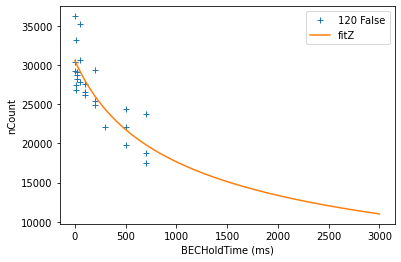

In [37]:
resultZ = getSubDF(resultsDF_pure_premix, ['latticeDepth_mW', 'latticeDetuning_GHz', 'compz'], [latticeDepth, latticeDetuning, compz])

NZ, gammaZ = resultZ[['N0', 'gamma']].iloc[0,:]
Z = N_polarized_premix(time, NZ, gammaZ)

plt.figure()
plt.plot(df_tempZ['BECHoldTime'], df_tempZ['nCount'], '+', label = str(round(latticeDepth, 2)) + ' ' + str(False))
plt.plot(time, Z, '-', label = 'fitZ')
plt.legend()
#plt.ylim(0, 20000)
#plt.xlim(0,10)
plt.xlabel('BECHoldTime (ms)')
plt.ylabel('nCount')
plt.show()

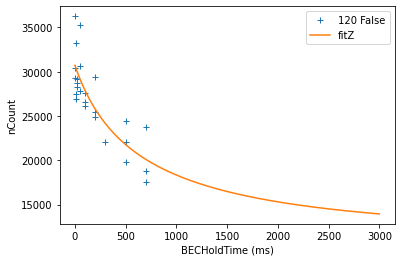

In [38]:
resultZ = getSubDF(resultsDF_mix, ['latticeDepth_mW', 'latticeDetuning_GHz', 'compz'], [latticeDepth, latticeDetuning, compz])

NZ, alphaZ, gammaZ = resultZ[['N0', 'alpha', 'gamma']].iloc[0,:]

Z = N_polarized(time, NZ, alphaZ, gammaZ)

plt.figure()
plt.plot(df_tempZ['BECHoldTime'], df_tempZ['nCount'], '+', label = str(round(latticeDepth, 2)) + ' ' + str(False))
plt.plot(time, Z, '-', label = 'fitZ')
plt.legend()
#plt.ylim(0,20000)
#plt.xlim(0,10)
plt.xlabel('BECHoldTime (ms)')
plt.ylabel('nCount')
plt.show()

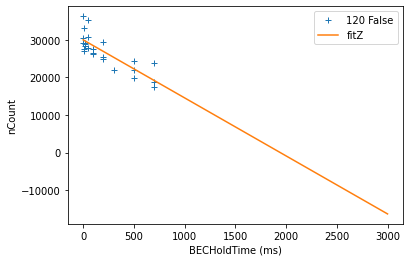

In [39]:
resultZ = getSubDF(resultsDF_lin, ['latticeDepth_mW', 'latticeDetuning_GHz', 'compz'], [latticeDepth, latticeDetuning, compz])

NZ, bZ = resultZ[['N0', 'b']].iloc[0,:]

Z = N_linear(time, NZ, bZ)

plt.figure()
plt.plot(df_tempZ['BECHoldTime'], df_tempZ['nCount'], '+', label = str(round(latticeDepth, 2)) + ' ' + str(False))
plt.plot(time, Z, '-', label = 'fitZ')
plt.legend()
#plt.ylim(0,30000)
#plt.xlim(0,100)
plt.xlabel('BECHoldTime (ms)')
plt.ylabel('nCount')
plt.show()

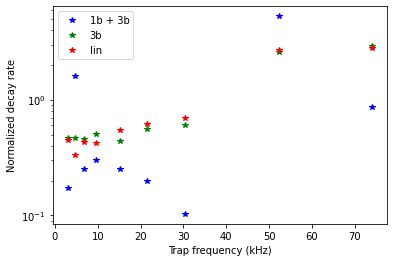

In [40]:
resultsDF_notLossy = getSubDF(resultsDF_mix, ['compz'], [compz])
resultsDF_notLossy_pure = getSubDF(resultsDF_pure, ['compz'], [compz])
resultsDF_notLossy_lin = getSubDF(resultsDF_lin, ['compz'], [compz])

#latticePower = -resultsDF_Z['latticeDepth']/resultsDF_Z['latticeDetuning']
trapFrequencyList = resultsDF_notLossy['trapFrequencyZ_kHz']
decay_1b3b = resultsDF_notLossy['gamma']/resultsDF_notLossy['gamma'].mean()
decay_3b = resultsDF_notLossy_pure['gamma']/resultsDF_notLossy_pure['gamma'].mean()
decay_lin = resultsDF_notLossy_lin['b']/resultsDF_notLossy_lin['b'].mean()

plt.figure()
plt.semilogy(trapFrequencyList, decay_1b3b, 'b*', label = '1b + 3b')
plt.semilogy(trapFrequencyList, decay_3b, 'g*', label = '3b')
plt.semilogy(trapFrequencyList, decay_lin, 'r*', label = 'lin')
plt.xlabel("Trap frequency (kHz)")
plt.ylabel("Normalized decay rate")


plt.legend()
#plt.ylim(0,0.2*10**(-11))
plt.show()

The increase in power should result in a smaller cloud. The density is proportional to $n\sim 1/(a_{oh}r_{\perp}^{2}) \sim \sqrt{\omega_{z}}\frac{\omega_{\perp}^{2}}{\mu}$. Assuming the chemical potential constant, the density $n$ goes like $(P/\Delta)^{5/4}$. In that case the decay coefficient which is proportional to $n^{2}$ should be scalled accordingly.
If we rather fix the scattering length $a$ and write $\mu\sim na$ then at constant $a$ it gives $n \sim (P/\Delta)^{5/8})$.

And $P/\Delta \propto \omega_{z}^{2}$

Note for a thermal cloud that gets compressed from $\omega_i$ to $\omega_f = k\omega_i$. $E_i = \sum \epsilon_i p_i$ and $E_f = \sum \epsilon_f p_f = \sum (k\epsilon_i) p_i = kE_i$. So the temperature goes like $T_f = kT_i$. But the probability to occupy each state remains the same, so $\omega^2 \Delta x^2/T = $ cste. There for $\Delta x_f = \Delta x_i/\sqrt{k}$. So a good proxy for the density is $n \propto 1/(a_z r^2) \propto \omega_z^{1/2} \sqrt{k}^{2} \propto \omega_z^{3/2}$. Or if we want to be more precise and take into consideration the ODT trapping, one should say $n \propto \omega_z^{1/2}\omega_{\perp,1}^{1/2}\omega_{\perp,2}^{1/2}$

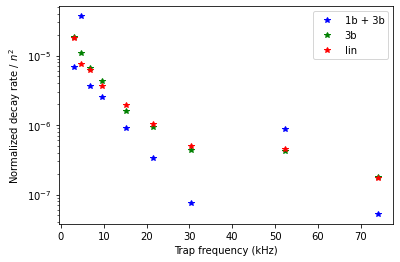

In [41]:
powerExponent = 3/2
# 3/2 for 2D thermal + 1D HO
# 5/2 for 2D BEC fixed chemical potential (wrong) + 1D HO
# 5/4 for 2D BEC fixed scattering length + 1D HO

trapFrequencyList = resultsDF_notLossy['trapFrequencyZ_kHz']
decay_1b3b = resultsDF_notLossy['gamma']/resultsDF_notLossy['gamma'].mean()/(trapFrequencyList**2)**(powerExponent)
decay_3b = resultsDF_notLossy_pure['gamma']/resultsDF_notLossy_pure['gamma'].mean()/(trapFrequencyList**2)**(powerExponent)
decay_lin = resultsDF_notLossy_lin['b']/resultsDF_notLossy_lin['b'].mean()/(trapFrequencyList**2)**(powerExponent)
### That was the previous scaling before we changed to take into account the ODT trapping

### Now it is simple n^2 \propto omega_z * omega_perp1^2 * omega_perp2^2
trapFrequencyList = resultsDF_notLossy['trapFrequencyZ_kHz']
trapFrequencyPerp1List = resultsDF_notLossy['trapFrequencyX_Hz']
trapFrequencyPerp2List = resultsDF_notLossy['trapFrequencyY_Hz']
decay_1b3b = resultsDF_notLossy['gamma']/resultsDF_notLossy['gamma'].mean()/(trapFrequencyList*trapFrequencyPerp1List*trapFrequencyPerp2List)
decay_3b = resultsDF_notLossy_pure['gamma']/resultsDF_notLossy_pure['gamma'].mean()/(trapFrequencyList*trapFrequencyPerp1List*trapFrequencyPerp2List)
decay_lin = resultsDF_notLossy_lin['b']/resultsDF_notLossy_lin['b'].mean()/(trapFrequencyList*trapFrequencyPerp1List*trapFrequencyPerp2List)


plt.figure()
plt.semilogy(trapFrequencyList, decay_1b3b, 'b*', label = '1b + 3b')
plt.semilogy(trapFrequencyList, decay_3b, 'g*', label = '3b')
plt.semilogy(trapFrequencyList, decay_lin, 'r*', label = 'lin')

plt.xlabel("Trap frequency (kHz)")
plt.ylabel("Normalized decay rate / $n^2$")
plt.legend()
#plt.ylim(0,0.2*10**(-11))
plt.show()

Let's use only the pure 3b fit

In [42]:
results = resultsDF_pure_premix
#results = resultsDF_pure
#results = resultsDF_lin

# Vertical deconvolution

In [43]:
xResolution_um = 3.02
yResolution_um = 3.46
results['xWidth_inSitu_v_um'] = np.sqrt(results['xWidth_inSitu_v_um']**2-xResolution_um**2)
results['yWidth_inSitu_v_um'] = np.sqrt(results['yWidth_inSitu_v_um']**2-yResolution_um**2)

In [44]:
latticeDepthList = np.sort(df['latticeDepth_mW'].unique())
BECHoldTimeList = np.sort(df['BECHoldTime'].unique())
latticeDetuningList = np.sort(df['latticeDetuning_GHz'].unique())
compzList = np.sort(df['compz'].unique())
ODTFactorList = np.sort(df['ODTFactor'].unique())

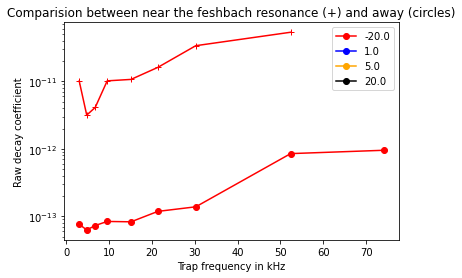

In [45]:
plt.figure()
i = 0
for latticeDetuning in latticeDetuningList:
    decay_notlossy = getSubDF(results, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, compz_not_lossy])
    decay_lossy = getSubDF(results, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, compz_lossy])
    plt.semilogy(decay_notlossy['trapFrequencyZ_kHz'], decay_notlossy['gamma'], color = colors[i], marker = 'o', label = latticeDetuning)
    plt.semilogy(decay_lossy['trapFrequencyZ_kHz'], decay_lossy['gamma'], color = colors[i], marker = '+')
    i += 1
plt.legend()
#plt.xlim(0,20)
plt.xlabel('Trap frequency in kHz')
plt.ylabel('Raw decay coefficient')
plt.title('Comparision between near the feshbach resonance (+) and away (circles)')
plt.show()

The average xWidth of the cloud is 4.36 pixel and yWidth is 4.45, each are 6.5 micro meters big and magnification is 4. It makes 7 micrometers cloud size (one sigma), so approximately 40 pancakes filled.

The nCount of the previous data was accounting a 3.45 micro meters pixel and 1 magnification, this should be corrected accordingly

For the temperature : $\sigma = \sqrt{\sigma_0^{2}+(\sigma_v\tau)^2}$ with $\sigma_{0} = 7 \mu m$ and $\tau$ the time of flight. And $\sigma_{v} = \sqrt{\frac{k_{B}T}{m}}$ so $T = \frac{m}{k_{B}}\frac{\sigma^2-\sigma^2_0}{\tau^2}$

In [46]:
#sigma_0_um = 7
sigma_0_um = 0

#df['temperature'] = (m/k_B*((df['xWidth_TOF_h_um']*um)**2-(df['xWidth_inSitu_v_um']*um)**2)/((df['TOF']*ms)**2))/nK # in nano kelvin
# if you use xWidth_inSitu_v_um there is nothing for red detuned runs

df['temperature_nK'] = (m/k_B*((df['xWidth_TOF_h_um']*um)**2-(sigma_0_um*um)**2)/((df['TOF']*ms)**2))/nK # in nano kelvin
df[['xWidth', 'xWidth_TOF_h_um','temperature_nK']]

,xWidth,xWidth_TOF_h_um,temperature_nK
0,21.8035,21.362295,999.712316
1,20.1178,24.850776,1352.879650
2,23.1791,28.260011,1749.540143
3,22.1837,24.560205,1321.427187
4,21.4783,26.806712,1574.223363
...,...,...,...
485,NaN,NaN,NaN
486,NaN,NaN,NaN
487,NaN,NaN,NaN
488,NaN,NaN,NaN


In [47]:
df_temperature = df.groupby(['latticeDetuning_GHz', 'BECHoldTime', 'latticeDepth_mW', 'ODTFactor', 'compz']).mean().reset_index()
df_initial_temperature = getSubDF(df_temperature, ['BECHoldTime'], [0]).groupby(['latticeDetuning_GHz', 'latticeDepth_mW', 'compz', 'ODTFactor']).mean().reset_index()

In [48]:
results = pd.merge(results, df_initial_temperature, how="outer", on=["latticeDetuning_GHz", "latticeDepth_mW", 'compz', 'ODTFactor'], suffixes=('', '_y'))#, validate="many_to_many")
results.drop(results.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

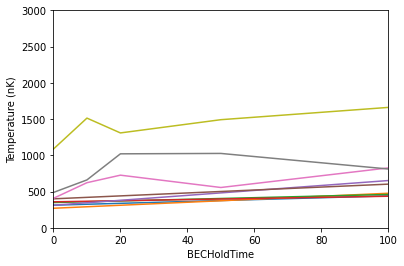

In [49]:
compz = compz_not_lossy
plt.figure()
for latticeDetuning in latticeDetuningList:
    for latticeDepth in latticeDepthList:
        df_temp = getSubDF(df_temperature, ['latticeDepth_mW', 'latticeDetuning_GHz', 'compz'], [latticeDepth, latticeDetuning, compz])
        plt.plot(df_temp['BECHoldTime'], df_temp['temperature_nK'] )
plt.ylim(0,3000)
plt.xlim(0,100)
plt.xlabel('BECHoldTime')
plt.ylabel('Temperature (nK)')
plt.show()

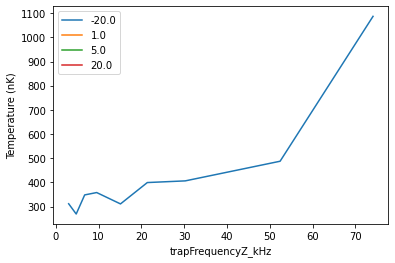

In [50]:
compz = compz_not_lossy
plt.figure()
for latticeDetuning in latticeDetuningList:
    df_temp = getSubDF(df_initial_temperature, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, compz])
    plt.plot(df_temp['trapFrequencyZ_kHz'], df_temp['temperature_nK'], label = latticeDetuning)
#plt.ylim(0,1000)
#plt.xlim(0,100)
plt.legend()
plt.xlabel('trapFrequencyZ_kHz')
plt.ylabel('Temperature (nK)')
plt.show()

The density is $N/V \simeq N/(2a_z(2a_{\perp})^2) = N/\left(8\sqrt{\hbar/(m\omega_z)}\sqrt{k_B T/m\omega_\perp^2}^{2}\right) = \frac{N m^{3/2}\omega_z^{1/2}\omega_\perp}{8\hbar^{1/2} k_B T} = \frac{N m^{3/2}\omega_z^{5/2}}{8A^2\hbar^{1/2} k_B T}$ with $A = \omega_z / \omega_\perp$ the aspect ratio (A = 162)

More precise calculation would be $P(r,z) = K e^{-\frac{z^2}{2a_z^{2}}} e^{-\frac{\frac{1}{2}m\omega_\perp^2 r^{2}}{k_B T}}$ and normalization condition gives for the N-particle 3D density probability $n(r,z) = \frac{N m \omega_\perp^{2}}{\pi^{3/2}\sqrt{2}a_z k_B T} e^{-\frac{z^2}{2a_z^{2}}} e^{-\frac{\frac{1}{2}m\omega_\perp^2 r^{2}}{k_B T}} = \frac{N m^{3/2} \omega_z^{5/2}}{\pi^{3/2}\sqrt{2}\hbar^{1/2}A^{2} k_B T} e^{-\frac{z^2}{2a_z^{2}}} e^{-\frac{\frac{1}{2}m\omega_\perp^2 r^{2}}{k_B T}}$. And we have $\pi^{3/2}\sqrt{2} = 7.87 \simeq 8$.

Eventually we changed this analysis to take into account the ODT trapping potential and we are keeping $n(r,z) = \frac{N m \omega_\perp^{2}}{\pi^{3/2}\sqrt{2}a_z k_B T} e^{-\frac{z^2}{2a_z^{2}}} e^{-\frac{\frac{1}{2}m\omega_\perp^2 r^{2}}{k_B T}} = \frac{N m^{3/2}\omega_z^{1/2} \omega_\perp^{2}}{\pi^{3/2}\sqrt{2}\hbar^{1/2} k_B T} e^{-\frac{z^2}{2a_z^{2}}} e^{-\frac{\frac{1}{2}m\omega_\perp^2 r^{2}}{k_B T}}$

Note that here the dependance looks to be like $\omega_z^{5/2}$ but there is a dependance hidden in the temperature that should go up like $\omega$, starting from 90-200 Hz in the ODT, up to 2 kHz in the deepest lattice, so there should be a factor of 10 there.

Now we can put units on the 3-body coefficient. WRONG: From the fit we get $\gamma = \beta<n^2>$. And the time unit of the fit is ms.
I keep the mistake here because it caused me some trouble. The real expression is $\beta = \gamma V^2$. Indeed $\frac{dN}{dt} = -\gamma N^3$ for the fit and $\frac{dN}{dt} = -\beta<n^2>N = -\beta/V^2 N^3$. Volume here is understood as the volume of all the pancakes combined.

# Notes from the BEC Calculation


## Temperature and trap frequency

### In BEC

In the BEC the density is like $n(x, y, z) = K e^{-\frac{\frac{1}{2}m(\omega_x^2 x^2 + \omega_y^2 y^2 + \omega_z^2 z^2)}{k_B T}} = N\omega_x\omega_y\omega_z\left(\frac{m}{2\pi k_B T}\right)^{3/2} e^{-\frac{\frac{1}{2}m(\omega_x^2 x^2 + \omega_y^2 y^2 + \omega_z^2 z^2)}{k_B T}} = n_0 e^{-\frac{\frac{1}{2}m(\omega_x^2 x^2 + \omega_y^2 y^2 + \omega_z^2 z^2)}{k_B T}}$

By definition $<n^2> = \int n^2p(x, y, z)d\tau = \frac{1}{N}\int n^3 d\tau = N^2 (\omega_x\omega_y\omega_z)^2\frac{1}{\sqrt{27}}\left(\frac{m}{2\pi k_B T}\right)^3 = \frac{N^2}{\sqrt{27}(2\pi)^3(\sigma_x\sigma_y\sigma_z)^2}$. The differential equation formula is: $\frac{dN}{dt} = -\gamma N^3$ in the fit, but $\frac{dN}{dt} = -\beta <n^2> N$ in reality, so $\frac{dN}{dt} = -\beta \frac{N^2}{\alpha} N$ with $\alpha = 3^{3/2}\left(\frac{2\pi k_B T}{m}\right)^3\frac{1}{(\omega_x\omega_y\omega_z)^2} = 3^{3/2}(2\pi)^3(\sigma_x\sigma_y\sigma_z)^2 = \frac{3^{3/2}}{(n_0/N)^2}$, so $\beta = \gamma\alpha$

### In the lattice

Note: I should use the full calculation of the gaussian wavepacket, in the mean time I can define a fake $\frac{1}{\bar a_z} = \frac{1}{\lambda /2\sqrt{2\pi}} + \frac{1}{a_z}$.
Indeed, for deep lattices, the density is $n(x, y, z) = n_0 e^{-\frac{\frac{1}{2}m(\omega_x^2 x^2 + \omega_y^2 y^2)}{k_B T}}e^{-\frac{z^2}{2a_z^2}}$ and therefore $\boxed{n_0 = \frac{Nm\omega_x\omega_y}{(2\pi)^{3/2}k_B T a_z} = \frac{Nm^{3/2}\omega_x\omega_y\omega_z^{1/2}}{(2\pi)^{3/2}k_B T \sqrt{\hbar}}}$ but in the case of a very weak lattice $a_z$ should saturate to a fixed value. Write the 3D density $n(x, y, z) = n_0 e^{-\frac{\frac{1}{2}m(\omega_x^2 x^2 + \omega_y^2 y^2)}{k_B T}}$ and integrate it on one lattice site $z = -\lambda/4 .. \lambda /4$ gives that $\frac{\lambda}{2} = \sqrt{2\pi a_{z,saturated}^2}$. A good interpolation would be $\frac{1}{\bar a_z} = \frac{1}{\lambda /2\sqrt{2\pi}} + \frac{1}{a_z}$. And it leads to the effective $\bar \omega_z = \left( \sqrt{\omega_z} + \frac{2\sqrt{2\pi}}{\lambda}\sqrt{\frac{\hbar}{m}}\right)^2 = \left( \sqrt{\omega_z} + \frac{2}{\sqrt{\pi}}\sqrt{\frac{E_r}{\hbar}}\right)^2$. The correction at $\omega_z = 0$ is about 2.8 kHz.

Then we again have $<n^2> = n_0^2/\sqrt{27}$ and the local differential equation is $\frac{dn}{dt} = -\beta n^2 n$ which integrated over the volume gives$\int_V \frac{dn}{dt} = \frac{dN}{dt} = -\int_V \beta n^2 n d\tau = -\int_V \beta n^2 Np(\tau) d\tau = -\beta <n(t)^2>N = -\beta\frac{n_0^2\left(\frac{N(t)}{N_0}\right)^2}{\sqrt{27}}N$. So eventually $\boxed{\frac{dN}{dt} =-\beta\frac{n_0^2}{N_0^2\sqrt{27}}N^3} = -\gamma N^3$

## In situ measurement

Other way to calculate the volume, simply use the in situ imaging with the density being $N/V \simeq N/(2a_x 2a_y 2a_z)^2) = \frac{N}{8(7\mu m 7.3\mu m 18\mu m)}$. Actually more precise calculation gives: $n = \frac{N}{(2\pi)^{3/2}\sigma_x\sigma_y\sigma_z}e^{-\frac{1}{2}(\frac{x^2}{\sigma_x^2}+\frac{y^2}{\sigma_y^2}+\frac{z^2}{\sigma_z^2})}$ and therefore $<n^2> = \frac{1}{N}\int n^3 d\tau = \frac{N^2}{3^{3/2}(2\pi)^3(\sigma_x\sigma_y\sigma_z)^2}$.

In [51]:
def effectiveOmegaZ(omega):
    return (np.sqrt(omega)+2*np.sqrt(2*np.pi*hbar/m)/(741*nm))**2

results['effectiveTrapFrequencyZ_kHz'] = effectiveOmegaZ(results['trapFrequencyZ_kHz']*kHz)/kHz

In [52]:
numberOfPancakes_fromBEC = 40 # for ODT Prefactor of 1
numberOfPancakes = numberOfPancakes_fromBEC/np.sqrt(np.maximum(results['ODTFactor'], 1))

temperature_nK = 400
prefactor = (m/(2*np.pi))**(3/2)/(k_B*np.sqrt(hbar))
# I assume here 400 nK, but eventually we should do a proper thermometry of the initial cloud.

#results['density'] = results['N0']/numberOfPancakes*prefactor*(2*np.pi*results['trapFrequency']*10**3)**(5/2)/(temperature_nK*10**(-9))*10**(-6)  # in atoms / cm3
trapFrequenciesProduct = (results['effectiveTrapFrequencyZ_kHz']*kHz)**(1/2)*results['trapFrequencyX_Hz']*Hz*results['trapFrequencyY_Hz']*Hz

# MODIFY THE NUMBER OF PANCAKES HERE
results['density_constantT'] = results['N0']/numberOfPancakes*prefactor/(temperature_nK*nK)*trapFrequenciesProduct*cm3  # in atoms / cm3

In [53]:
results['beta_constantT'] = results['gamma']/ms  * results['N0']**2 * np.sqrt(27) / results['density_constantT']**2 # this is is cm^6/s

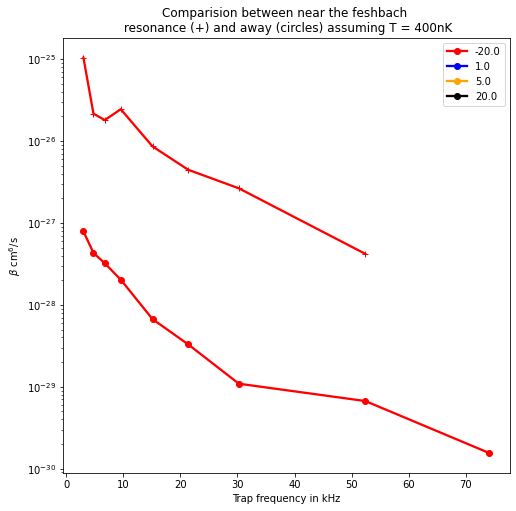

In [54]:
plt.figure(figsize = (8, 8))
i = 0
for latticeDetuning in latticeDetuningList:
    decay_notlossy = getSubDF(results, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, compz_not_lossy])
    decay_lossy = getSubDF(results, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, compz_lossy])
    for ODTFactor in results['ODTFactor'].unique():
        decay_notlossy_2 = getSubDF(decay_notlossy, ['ODTFactor'], [ODTFactor])
        decay_lossy_2 = getSubDF(decay_lossy, ['ODTFactor'], [ODTFactor])
        plt.semilogy(decay_notlossy_2['trapFrequencyZ_kHz'], decay_notlossy_2['beta_constantT'], color = colors[i], marker = 'o', linewidth = 0.3 + ODTFactor/2, label = latticeDetuning)
        plt.semilogy(decay_lossy_2['trapFrequencyZ_kHz'], decay_lossy_2['beta_constantT'], color = colors[i], marker = '+', linewidth = 0.3 + ODTFactor/2)
    i += 1
plt.legend()
#plt.xlim(0,20)
plt.xlabel('Trap frequency in kHz')
plt.ylabel(r'$\beta$ cm$^6/$s')
plt.title('Comparision between near the feshbach \n resonance (+) and away (circles) assuming T = 400nK')
plt.savefig('beta_coef.jpg', dpi = 300, transparent = False)
plt.show()

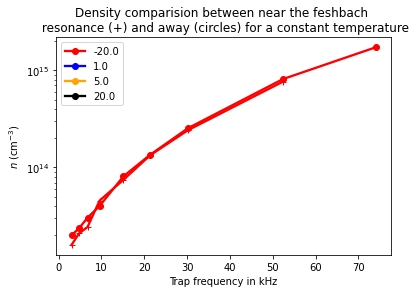

In [55]:
plt.figure()
i = 0

for latticeDetuning in latticeDetuningList:
    decay_notlossy = getSubDF(results, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, compz_not_lossy])
    decay_lossy = getSubDF(results, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, compz_lossy])
    for ODTFactor in results['ODTFactor'].unique():
        decay_notlossy_2 = getSubDF(decay_notlossy, ['ODTFactor'], [ODTFactor])
        decay_lossy_2 = getSubDF(decay_lossy, ['ODTFactor'], [ODTFactor])
        plt.semilogy(decay_notlossy_2['trapFrequencyZ_kHz'], decay_notlossy_2['density_constantT'], color = colors[i], marker = 'o', linewidth = 0.3 + ODTFactor/2, label = latticeDetuning)
        plt.semilogy(decay_lossy_2['trapFrequencyZ_kHz'], decay_lossy_2['density_constantT'], color = colors[i], marker = '+', linewidth = 0.3 + ODTFactor/2)
    i += 1
plt.legend()
#plt.xlim(0,20)
plt.xlabel('Trap frequency in kHz')
plt.ylabel(r'$n$ (cm$^{-3}$)')
plt.title('Density comparision between near the feshbach \n resonance (+) and away (circles) for a constant temperature')
plt.savefig('density.jpg', dpi = 300, transparent = False)
plt.show()

We can also do the version where we take the initial temperature of each run

## With temperature measurements

In [56]:
results['density_temperature'] = results['N0']/numberOfPancakes*prefactor/(results['temperature_nK']*nK)*trapFrequenciesProduct*cm3  # in atoms / cm3
results['beta_temperature'] = results['gamma']/ms* results['N0']**2 * np.sqrt(27) / results['density_temperature']**2    # this is is cm^6/s
#results['beta_temperature_limit'] = 2*18/(results['N0']**3)* results['N0']**2 * np.sqrt(27) / results['density_temperature']**2
# gamma = 2b/N0**3 and I plugged 18 s-1 as the vacuum limit. Why did I write that?
results['beta_temperature_limit'] = (1/18)*np.sqrt(27)/results['density_temperature']**2 
# at initial time -b = 1/(18 seconds) = -beta*<n^2> = -beta*n^2/sqrt(27)

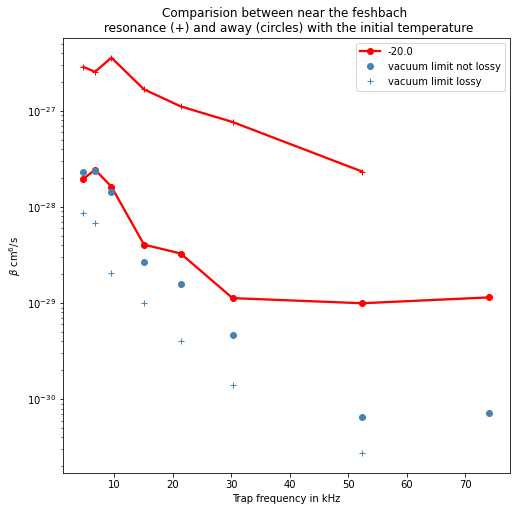

In [57]:
plt.figure(figsize = (8,8))
i = 0

for latticeDetuning in latticeDetuningList:
    decay_notlossy = getSubDF(results, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, compz_not_lossy])
    decay_lossy = getSubDF(results, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, compz_lossy])
    for ODTFactor in results['ODTFactor'].unique():
        decay_notlossy_2 = getSubDF(decay_notlossy, ['ODTFactor'], [ODTFactor])
        decay_lossy_2 = getSubDF(decay_lossy, ['ODTFactor'], [ODTFactor])
        if not (decay_lossy_2.empty and decay_notlossy_2.empty):
            plt.semilogy(decay_notlossy_2['trapFrequencyZ_kHz'], decay_notlossy_2['beta_temperature'], color = colors[i], marker = 'o', linewidth = 0.3 + ODTFactor/2, label = latticeDetuning)
            plt.semilogy(decay_lossy_2['trapFrequencyZ_kHz'], decay_lossy_2['beta_temperature'], color = colors[i], marker = '+', linewidth = 0.3 + ODTFactor/2)
            plt.semilogy(decay_notlossy_2['trapFrequencyZ_kHz'], decay_notlossy_2['beta_temperature_limit'], 'o', color = 'steelblue', label = "vacuum limit not lossy")
            plt.semilogy(decay_lossy_2['trapFrequencyZ_kHz'], decay_lossy_2['beta_temperature_limit'], '+', color = 'steelblue', label = "vacuum limit lossy")
    i += 1
plt.legend()
#plt.xlim(0,20)
plt.xlabel('Trap frequency in kHz')
plt.ylabel(r'$\beta$ cm$^6/$s')
plt.title('Comparision between near the feshbach \n resonance (+) and away (circles) with the initial temperature')
plt.show()

## With the size for the blue lattice

In [58]:
results.columns

Index(['N0', 'alpha', 'gamma', 'b', 'TOF', 'latticeDepth_mW',
       'latticeDetuning_GHz', 'compz', 'ODT3_Comp_final', 'nCount', 'xPos',
       'yPos', 'ODTFactor', 'latticeDetuning_real', 'xWidth_TOF_h_um',
       'zWidth_TOF_h_um', 'trapFrequencyZ_kHz', 'deconfiningTrapFrequency_Hz',
       'bareTrapFrequencyX_Hz', 'bareTrapFrequencyY_Hz', 'trapFrequencyX_Hz',
       'trapFrequencyY_Hz', 'xWidth_inSitu_v_um', 'yWidth_inSitu_v_um',
       'BECHoldTime', 'dummy', 'xWidth', 'yWidth', 'imageID', 'temperature_nK',
       'effectiveTrapFrequencyZ_kHz', 'density_constantT', 'beta_constantT',
       'density_temperature', 'beta_temperature', 'beta_temperature_limit'],
      dtype='object')

In [59]:
results[results['latticeDetuning_GHz'] == 5].iloc[:, 10:30]

,xPos,yPos,ODTFactor,latticeDetuning_real,xWidth_TOF_h_um,zWidth_TOF_h_um,trapFrequencyZ_kHz,deconfiningTrapFrequency_Hz,bareTrapFrequencyX_Hz,bareTrapFrequencyY_Hz,trapFrequencyX_Hz,trapFrequencyY_Hz,xWidth_inSitu_v_um,yWidth_inSitu_v_um,BECHoldTime,dummy,xWidth,yWidth,imageID,temperature_nK


In [60]:
prefactor_size = 1/(2*np.pi)**(3/2)
a_z = np.sqrt(hbar/(m*results['trapFrequencyZ_kHz']*kHz))
size_product = results['xWidth_inSitu_v_um']*um*results['yWidth_inSitu_v_um']*um*a_z

results['density_size'] = results['N0']/numberOfPancakes*prefactor_size/size_product*cm3  # in atoms / cm3
results['beta_size'] = results['gamma']/ms* results['N0']**2 * np.sqrt(27) / results['density_size']**2    # this is is cm^6/s

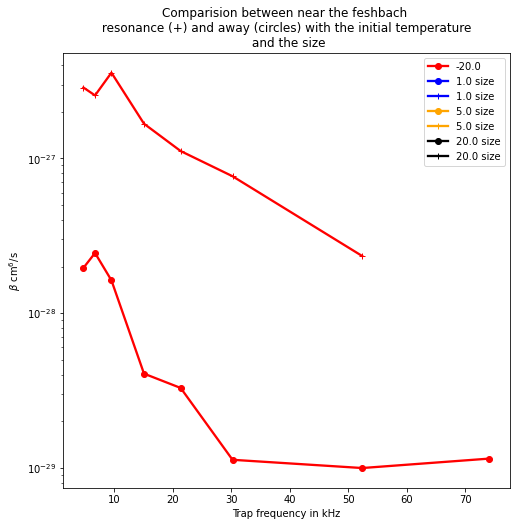

In [61]:
plt.figure(figsize = (8,8))
i = 0

for latticeDetuning in latticeDetuningList:
    decay_notlossy = getSubDF(results, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, compz_not_lossy])
    decay_lossy = getSubDF(results, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, compz_lossy])
    for ODTFactor in results['ODTFactor'].unique():
        if latticeDetuning < 0:
            decay_notlossy_2 = getSubDF(decay_notlossy, ['ODTFactor'], [ODTFactor])
            decay_lossy_2 = getSubDF(decay_lossy, ['ODTFactor'], [ODTFactor])
            plt.semilogy(decay_notlossy_2['trapFrequencyZ_kHz'], decay_notlossy_2['beta_temperature'], color = colors[i], marker = 'o', linewidth = 0.3 + ODTFactor/2, label = latticeDetuning)
            plt.semilogy(decay_lossy_2['trapFrequencyZ_kHz'], decay_lossy_2['beta_temperature'], color = colors[i], marker = '+', linewidth = 0.3 + ODTFactor/2)
        if latticeDetuning > 0:
            decay_blue_notlossy = getSubDF(results, ['latticeDetuning_GHz', 'compz', 'ODTFactor'], [latticeDetuning, 7.4, ODTFactor])
            #plt.semilogy(decay_blue_notlossy['trapFrequency']/(2*np.pi*10**3), decay_blue_notlossy['initialBeta'], color = colors[i], marker = 'x', linewidth = 0.3 + ODTFactor/2, label = latticeDetuning)
            plt.semilogy(decay_blue_notlossy['trapFrequencyZ_kHz'], decay_blue_notlossy['beta_size'], color = colors[i], marker = 'o', linewidth = 0.3 + ODTFactor/2, label = str(latticeDetuning) + ' size')
            decay_blue_lossy = getSubDF(results, ['latticeDetuning_GHz', 'compz', 'ODTFactor'], [latticeDetuning, 7.72, ODTFactor])
            #plt.semilogy(decay_blue_notlossy['trapFrequency']/(2*np.pi*10**3), decay_blue_notlossy['initialBeta'], color = colors[i], marker = 'x', linewidth = 0.3 + ODTFactor/2, label = latticeDetuning)
            plt.semilogy(decay_blue_lossy['trapFrequencyZ_kHz'], decay_blue_lossy['beta_size'], color = colors[i], marker = '+', linewidth = 0.3 + ODTFactor/2, label = str(latticeDetuning) + ' size')
            #plt.semilogy()
    i += 1
plt.legend()
#plt.xlim(0,20)
plt.xlabel('Trap frequency in kHz')
plt.ylabel(r'$\beta$ cm$^6/$s')
plt.title('Comparision between near the feshbach \n resonance (+) and away (circles) with the initial temperature \n and the size')
plt.show()

In [62]:
results.columns

Index(['N0', 'alpha', 'gamma', 'b', 'TOF', 'latticeDepth_mW',
       'latticeDetuning_GHz', 'compz', 'ODT3_Comp_final', 'nCount', 'xPos',
       'yPos', 'ODTFactor', 'latticeDetuning_real', 'xWidth_TOF_h_um',
       'zWidth_TOF_h_um', 'trapFrequencyZ_kHz', 'deconfiningTrapFrequency_Hz',
       'bareTrapFrequencyX_Hz', 'bareTrapFrequencyY_Hz', 'trapFrequencyX_Hz',
       'trapFrequencyY_Hz', 'xWidth_inSitu_v_um', 'yWidth_inSitu_v_um',
       'BECHoldTime', 'dummy', 'xWidth', 'yWidth', 'imageID', 'temperature_nK',
       'effectiveTrapFrequencyZ_kHz', 'density_constantT', 'beta_constantT',
       'density_temperature', 'beta_temperature', 'beta_temperature_limit',
       'density_size', 'beta_size'],
      dtype='object')

In [63]:
getSubDF(results, ['latticeDetuning_GHz', 'latticeDepth_mW'], [1, 120])[['N0', 'gamma', 'density_size', 'xWidth_inSitu_v_um', 'yWidth_inSitu_v_um']]

,N0,gamma,density_size,xWidth_inSitu_v_um,yWidth_inSitu_v_um


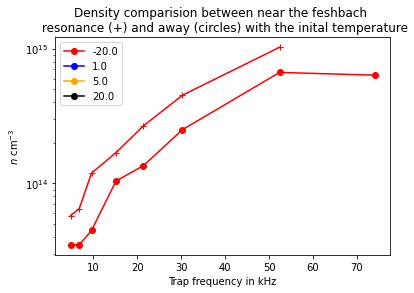

In [64]:
plt.figure()
i = 0
for latticeDetuning in latticeDetuningList:
    decay_notlossy = getSubDF(results, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, compz_not_lossy])
    decay_lossy = getSubDF(results, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, compz_lossy])
    plt.semilogy(decay_notlossy['trapFrequencyZ_kHz'], decay_notlossy['density_temperature'], color = colors[i], marker = 'o', label = latticeDetuning)
    plt.semilogy(decay_lossy['trapFrequencyZ_kHz'], decay_lossy['density_temperature'], color = colors[i], marker = '+')
    i += 1
plt.legend()
#plt.xlim(0,20)
plt.xlabel('Trap frequency in kHz')
plt.ylabel(r'$n$ cm$^{-3}$')
plt.title('Density comparision between near the feshbach \n resonance (+) and away (circles) with the inital temperature')
plt.show()

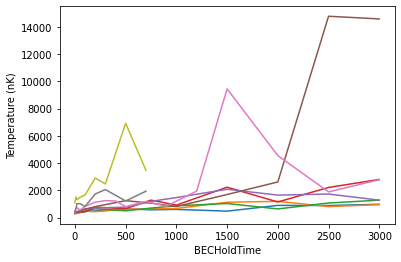

In [65]:
plt.figure()
for latticeDetuning in latticeDetuningList:
    for latticeDepth in latticeDepthList:
        df_temp = getSubDF(df_temperature, ['latticeDepth_mW', 'latticeDetuning_GHz', 'compz'], [latticeDepth, latticeDetuning, compz])
        plt.plot(df_temp['BECHoldTime'], df_temp['temperature_nK'] )
        #df_temp = getSubDF(df, ['latticeDepth', 'latticeDetuning', 'compz'], [latticeDepth, latticeDetuning, compz])
        #plt.plot(df_temp['BECHoldTime'], df_temp['yWidth'] )
        
#plt.ylim(0,100)
#plt.xlim(0,100)
plt.xlabel('BECHoldTime')
plt.ylabel('Temperature (nK)')
plt.show()

In [66]:
df_temp = getSubDF(df_inSitu, ['latticeDetuning_GHz', 'compz'], [20, 7.72]).groupby(['latticeDepth_mW']).mean().reset_index()
df_temp.columns

Index(['latticeDepth_mW', 'BECHoldTime', 'TOF', 'latticeDetuning_GHz', 'compz',
       'ODT3_Comp_final', 'dummy', 'nCount', 'xWidth', 'yWidth', 'xPos',
       'yPos', 'imageID', 'ODTFactor', 'xWidth_inSitu_v_um',
       'yWidth_inSitu_v_um', 'trapFrequencyZ_kHz',
       'deconfiningTrapFrequency_Hz', 'bareTrapFrequencyX_Hz',
       'bareTrapFrequencyY_Hz', 'trapFrequencyX_Hz', 'trapFrequencyY_Hz'],
      dtype='object')

In [67]:
df_inSitu['latticeDetuning_GHz'].unique()

array([ 1.,  5., 20.])

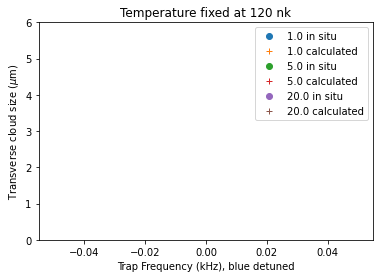

In [68]:
compz = compz_lossy
ODT3_Comp_final = 5

plt.figure()
for latticeDetuning in df_inSitu['latticeDetuning_GHz'].unique():
    df_temp = getSubDF(results, ['latticeDetuning_GHz', 'ODT3_Comp_final', 'compz'], [latticeDetuning, ODT3_Comp_final, compz]).groupby(['latticeDepth_mW']).mean().reset_index()    
    plt.plot(df_temp['trapFrequencyZ_kHz'], df_temp['xWidth_inSitu_v_um'], 'o', label = str(latticeDetuning) + ' in situ' )
    plt.plot(df_temp['trapFrequencyZ_kHz'], np.sqrt(k_B*120*10**(-9)/(m*(df_temp['trapFrequencyX_Hz']*Hz)**2))/(10**(-6)), '+', label = str(latticeDetuning) + ' calculated')
plt.legend()
plt.ylabel('Transverse cloud size ($\mu$m)')
plt.xlabel('Trap Frequency (kHz), blue detuned')
plt.title('Temperature fixed at 120 nk')
plt.ylim(0,6)
plt.show()

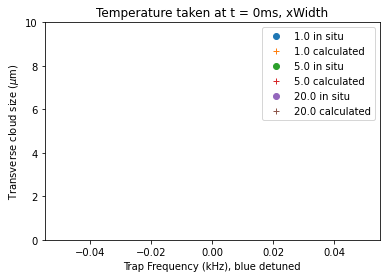

In [69]:
compz = compz_lossy
ODT3_Comp_final = 5

plt.figure()
for latticeDetuning in df_inSitu['latticeDetuning_GHz'].unique():
    df_temp = getSubDF(results, ['latticeDetuning_GHz', 'ODT3_Comp_final', 'compz'], [latticeDetuning, ODT3_Comp_final, compz]).groupby(['latticeDepth_mW']).mean().reset_index()    
    plt.plot(df_temp['trapFrequencyZ_kHz'], df_temp['xWidth_inSitu_v_um'], 'o', label = str(latticeDetuning) + ' in situ' )
    df_temp1 = getSubDF(df, ['latticeDetuning_GHz', 'BECHoldTime'], [latticeDetuning, 30]).groupby(['latticeDepth_mW']).mean().reset_index()
    df_temp2 = getSubDF(df_temperature, ['latticeDetuning_GHz', 'compz', 'BECHoldTime'], [latticeDetuning, compz, 30]).sort_values('latticeDepth_mW')
    #plt.plot(df_temp1['trapFrequencyZ_kHz'], np.sqrt(k_B*df_temp2['temperature_nK']*nK/(m*df_temp1['trapFrequencyX_Hz']**2))/(10**(-6)), '+', label = str(latticeDetuning) + ' calculated')
    plt.plot(df_temp['trapFrequencyZ_kHz'], np.sqrt(k_B*df_temp['temperature_nK']*nK/(m*(df_temp['trapFrequencyX_Hz']*Hz)**2))/um, '+', label = str(latticeDetuning) + ' calculated')
plt.legend()
plt.title('Temperature taken at t = 0ms, xWidth')
plt.ylabel('Transverse cloud size ($\mu$m)')
plt.xlabel('Trap Frequency (kHz), blue detuned')
plt.ylim(0,10)
plt.show()

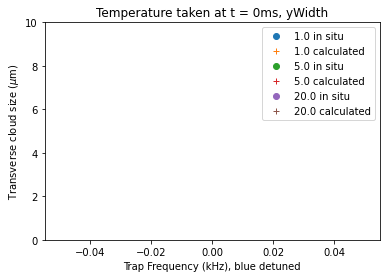

In [70]:
compz = compz_lossy
ODT3_Comp_final = 5

plt.figure()
for latticeDetuning in df_inSitu['latticeDetuning_GHz'].unique():
    df_temp = getSubDF(results, ['latticeDetuning_GHz', 'ODT3_Comp_final', 'compz'], [latticeDetuning, ODT3_Comp_final, compz]).groupby(['latticeDepth_mW']).mean().reset_index()    
    plt.plot(df_temp['trapFrequencyZ_kHz'], df_temp['yWidth_inSitu_v_um'], 'o', label = str(latticeDetuning) + ' in situ' )
    df_temp1 = getSubDF(df, ['latticeDetuning_GHz', 'BECHoldTime'], [latticeDetuning, 30]).groupby(['latticeDepth_mW']).mean().reset_index()
    df_temp2 = getSubDF(df_temperature, ['latticeDetuning_GHz', 'compz', 'BECHoldTime'], [latticeDetuning, compz, 30]).sort_values('latticeDepth_mW')
    #plt.plot(df_temp1['trapFrequencyZ_kHz'], np.sqrt(k_B*df_temp2['temperature_nK']*nK/(m*df_temp1['trapFrequencyX_Hz']**2))/(10**(-6)), '+', label = str(latticeDetuning) + ' calculated')
    plt.plot(df_temp['trapFrequencyZ_kHz'], np.sqrt(k_B*df_temp['temperature_nK']*nK/(m*(df_temp['trapFrequencyY_Hz']*Hz)**2))/um, '+', label = str(latticeDetuning) + ' calculated')
plt.legend()
plt.title('Temperature taken at t = 0ms, yWidth')
plt.ylabel('Transverse cloud size ($\mu$m)')
plt.xlabel('Trap Frequency (kHz), blue detuned')
plt.ylim(0,10)
plt.show()

In [71]:
getSubDF(results, ['latticeDetuning_GHz', 'latticeDepth_mW'], [1, 0.2])[['ODTFactor', 'trapFrequencyX_Hz', 'trapFrequencyY_Hz']]

,ODTFactor,trapFrequencyX_Hz,trapFrequencyY_Hz


In [72]:
results.iloc[:20,:10]

,N0,alpha,gamma,b,TOF,latticeDepth_mW,latticeDetuning_GHz,compz,ODT3_Comp_final,nCount
0,28276.396369,0.000056,7.632808e-14,NaN,9.0,0.2,-20.0,7.40,3.00,25268.451613
1,27189.824792,0.000056,6.303485e-14,NaN,9.0,0.5,-20.0,7.40,3.00,24505.533333
2,28024.434844,0.000056,7.322157e-14,NaN,7.0,1.0,-20.0,7.40,3.00,25113.000000
3,27296.389427,0.000056,8.415877e-14,NaN,5.0,2.0,-20.0,7.40,3.00,24266.666667
4,31907.515052,0.000056,8.308833e-14,NaN,5.0,5.0,-20.0,7.40,3.00,27900.400000
5,31250.119680,0.000056,1.185686e-13,NaN,5.0,10.0,-20.0,7.40,3.00,26726.400000
6,31277.871476,0.000056,1.386076e-13,NaN,5.0,20.0,-20.0,7.40,3.00,27856.019608
7,31630.237889,0.000056,8.497345e-13,NaN,5.0,60.0,-20.0,7.40,3.00,27732.333333
8,30591.600453,0.000056,9.519522e-13,NaN,3.0,120.0,-20.0,7.40,3.00,26877.600000
9,22533.781289,0.000056,1.008961e-11,NaN,8.0,0.2,-20.0,7.83,0.38,16241.454545


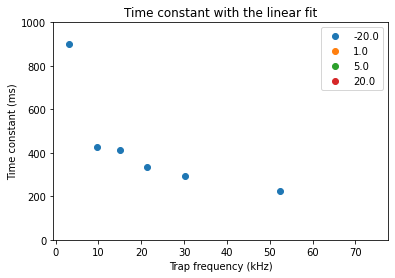

In [73]:
# Plot of the time constant
plt.figure()
for latticeDetuning in latticeDetuningList:
    results_temp = getSubDF(resultsDF_lin, ['latticeDetuning_GHz'], [latticeDetuning])
    plt.plot(results_temp['trapFrequencyZ_kHz'], results_temp['N0']/results_temp['b'], 'o', label = latticeDetuning)
plt.legend()
plt.title('Time constant with the linear fit')
plt.xlabel('Trap frequency (kHz)')
plt.ylabel('Time constant (ms)')
plt.ylim(0,1000)
plt.show()

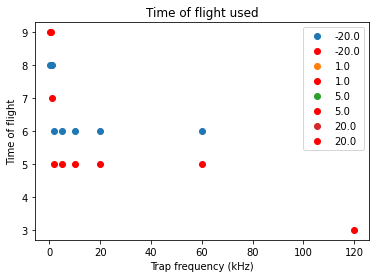

In [74]:
# Plot of the time constant
plt.figure()
for latticeDetuning in latticeDetuningList:
    results_temp = getSubDF(resultsDF_pure, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, compz_lossy])
    plt.plot(results_temp['latticeDepth_mW'], results_temp['TOF'], 'o', label = latticeDetuning)
    results_temp = getSubDF(resultsDF_pure, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, compz_not_lossy])
    plt.plot(results_temp['latticeDepth_mW'], results_temp['TOF'], 'o', label = latticeDetuning, color = 'red')
plt.legend()
plt.title('Time of flight used')
plt.xlabel('Trap frequency (kHz)')
plt.ylabel('Time of flight')
#plt.ylim(0,80)
plt.show()

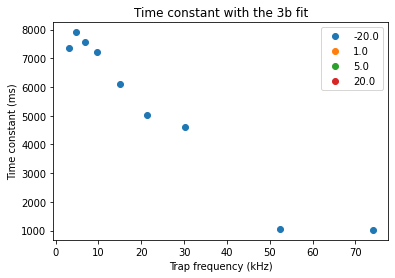

In [75]:
# Plot of the time constant
plt.figure()
for latticeDetuning in latticeDetuningList:
    results_temp = getSubDF(resultsDF_pure, ['latticeDetuning_GHz', 'compz'], [latticeDetuning, compz_not_lossy])
    plt.plot(results_temp['trapFrequencyZ_kHz'], 1/(results_temp['N0']**2*results_temp['gamma']), 'o', label = latticeDetuning)
plt.legend()
plt.title('Time constant with the 3b fit')
plt.xlabel('Trap frequency (kHz)')
plt.ylabel('Time constant (ms)')
#plt.ylim(0,80)
plt.show()

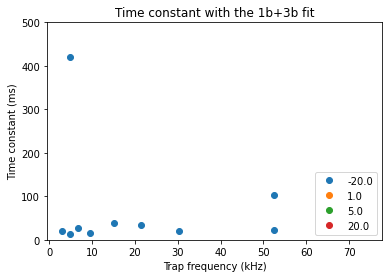

In [76]:
# Plot of the time constant
plt.figure()
for latticeDetuning in latticeDetuningList:
    results_temp = getSubDF(resultsDF_mix, ['latticeDetuning_GHz'], [latticeDetuning])
    plt.plot(results_temp['trapFrequencyZ_kHz'], 1/(results_temp['N0']**2*results_temp['gamma']), 'o', label = latticeDetuning)
plt.legend()
plt.title('Time constant with the 1b+3b fit')
plt.xlabel('Trap frequency (kHz)')
plt.ylabel('Time constant (ms)')
plt.ylim(0,500)
plt.show()

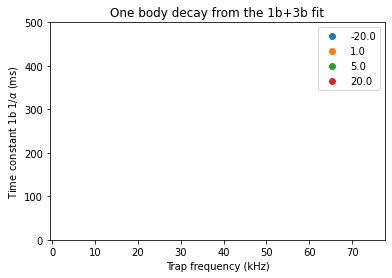

In [77]:
# Plot of the time constant
plt.figure()
for latticeDetuning in latticeDetuningList:
    results_temp = getSubDF(resultsDF_mix, ['latticeDetuning_GHz'], [latticeDetuning])
    plt.plot(results_temp['trapFrequencyZ_kHz'], 1/results_temp['alpha'], 'o', label = latticeDetuning)
plt.legend()
plt.title('One body decay from the 1b+3b fit')
plt.xlabel('Trap frequency (kHz)')
plt.ylabel(r'Time constant 1b $1/\alpha$ (ms)')
plt.ylim(0,500)
plt.show()

Adiabatic criterion. What is the real one?

Blue case: the smallest radial trap frequencies are about 200Hz with ODT3Comp = 5. Which means about 0.5ms should be fine and still adiabatic for the $z$ direction (starts at 3kHz). This trap frequency remains in the vicinity and might diminish to ~100Hz. It's best to be too fast than too slow in order not to change the temperature measurement.

Red case: smallest depends on the ODTFactor, but taking -20GHz and 0.2mW with ODTFactor = 4 we have 140Hz in X and 60Hz in Y. Agains starting at 0.5ms sounds good. -1GHz 120mW will be closer to 2kHz trap frequency while the Z is 300kHz, so 10 $\mu$s is good there.

A good formula would be $500\mu$s constant in the blue case and then noticing that $100$mW and -2GHz gives about 240kHz trap frequency, which is suitable for 10$\mu$s ramping time, then something that goes inversly propotionnal to $\sqrt{\frac{P/100}{\Delta/2}}$ is good. You want to saturate at 500$\mu$s at 0 power so:
\[\tau = max\left(\frac{10 \mu s}{\frac{10}{500} + \sqrt{\frac{P/100}{\Delta/2}}}, 10\mu s\right)\]

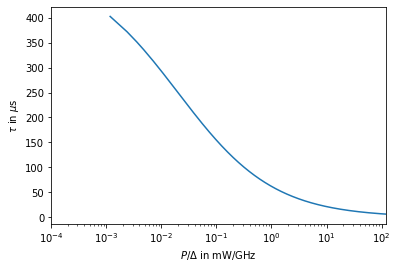

In [78]:
X = np.linspace(0.1/85, 120, 100000)   # X = P/Delta
Y = 10/(10/500+np.sqrt(X/50))
plt.figure()
plt.semilogx(X, Y)
plt.ylabel(r'$\tau$ in $\mu$s')
plt.xlabel(r'$P/\Delta$ in mW/GHz')
plt.xlim(0.0001, 120)
plt.show()

## Temperature plots

In [79]:
latticeDepth = 0.5
latticeDetuning = -20
compz = compz_not_lossy
ODTFactor = 4
df_tempZ = getSubDF(df, ['latticeDepth_mW', 'latticeDetuning_GHz', 'compz', 'ODTFactor'], [latticeDepth, latticeDetuning, compz, ODTFactor])
time = np.linspace(0, 3000, 10000)

In [80]:
df_tempZ[['nCount', 'temperature_nK', 'BECHoldTime']]

,nCount,temperature_nK,BECHoldTime
0,20045.0,501.783231,750.0
1,22068.0,957.996604,750.0
2,33869.0,219.133511,0.0
3,30936.0,598.134947,500.0
4,23671.0,832.465770,2000.0
5,18450.0,479.928064,750.0
6,24495.0,844.405717,2500.0
7,22572.0,361.035743,200.0
8,31562.0,477.681935,100.0
9,21462.0,1442.462919,2000.0


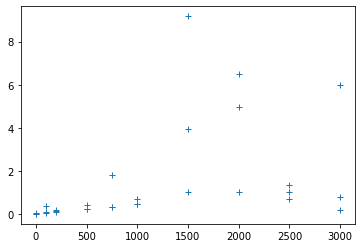

In [81]:
plt.figure()
plt.plot(df_tempZ['BECHoldTime'], df_tempZ['temperature_nK']**3/df_tempZ['nCount']**2, '+')
# I should actually correct for the density
plt.show()

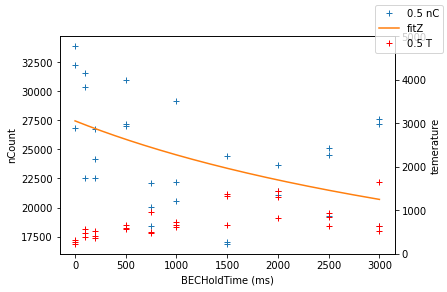

"\n# Create some mock data\nt = np.arange(0.01, 10.0, 0.01)\ndata1 = np.exp(t)\ndata2 = np.sin(2 * np.pi * t)\n\n\ncolor = 'tab:red'\nax1.set_xlabel('time (s)')\nax1.set_ylabel('exp', color=color)\nax1.plot(t, data1, color=color)\nax1.tick_params(axis='y', labelcolor=color)\n\nax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis\n\ncolor = 'tab:blue'\nax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1\nax2.plot(t, data2, color=color)\nax2.tick_params(axis='y', labelcolor=color)\n\nfig.tight_layout()  # otherwise the right y-label is slightly clipped\nplt.show()"

In [82]:
resultZ = getSubDF(resultsDF_pure, ['latticeDepth_mW', 'latticeDetuning_GHz', 'compz'], [latticeDepth, latticeDetuning, compz])

NZ, gammaZ = resultZ[['N0', 'gamma']].iloc[0,:]
Z = N_polarized_pure3b(time, NZ, gammaZ)

fig, ax1 = plt.subplots()
ax1.set_xlabel('BECHoldTime (ms)')
ax1.set_ylabel('nCount')
ax1.plot(df_tempZ['BECHoldTime'], df_tempZ['nCount'], '+', label = str(round(latticeDepth, 2)) + " nC")
ax1.plot(time, Z, '-', label = 'fitZ')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('temerature')  # we already handled the x-label with ax1
ax2.plot(df_tempZ['BECHoldTime'], df_tempZ['temperature_nK'], '+', color = 'red', label = str(round(latticeDepth, 2)) + ' T')
ax2.set_ylim(0,5000)
fig.legend()
#fig.tight_layout()
#plt.ylim(0, 20000)
#plt.xlim(0,10)

plt.show()

"""
# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)


color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()"""

In [83]:
df_tempZ[df_tempZ['temperature_nK'] < 250].iloc[:,10:35]

,xPos,yPos,imageID,experiment,ODTFactor,latticeDetuning_real,xWidth_TOF_h_um,zWidth_TOF_h_um,trapFrequencyZ_kHz,deconfiningTrapFrequency_Hz,bareTrapFrequencyX_Hz,bareTrapFrequencyY_Hz,trapFrequencyX_Hz,trapFrequencyY_Hz,xWidth_inSitu_v_um,yWidth_inSitu_v_um,temperature_nK
2,1018.37,1017.47,169352.0,TOF,4.0,-20.0,30.004475,36.652432,4.782809,20.112842,140.0,56.0,143.079131,63.305906,NaN,NaN,219.133511


### End

Now let's look at the TOF series

In [84]:
df_TOF
latticeDepthList_TOF = df_TOF['latticeDepth'].unique()

plt.figure()
for latticeDepth in latticeDepthList_TOF[-1:]:
    df_run = getRun(df_TOF, latticeDepth, False, -5)
    plt.plot(df_run['TOF'], df_run['xWidth'], '*', label = 'Z')
    plt.plot(df_run['TOF'], df_run['yWidth'], '+', label = 'trans')
    
plt.xlabel("TOF")
plt.ylabel("Width")
plt.legend()
plt.show()

KeyError: 'latticeDepth'

In [ ]:
def sigma(t, sigma0, v):
    return np.sqrt(sigma0**2+(v*t)**2)

def fitRun_sigma(df_run, XorY = 'xWidth'):
    sigma0_guess = df_run[XorY].min()
    v_guess = df_run[XorY].max()/df_run['TOF'].max()
    popt, pcov = curve_fit(sigma, df_run['TOF'], df_run[XorY],
                       p0 = [sigma0_guess, v_guess]
                          )#bounds = ((0, 0), (np.inf, np.inf)),
                           #method = 'trf'
                      #)
    return popt, pcov

results_sigma = []
for latticeDetuning in latticeDetuningList:
    for latticeDepth in latticeDepthList:
        df_run = getRun(df_TOF, latticeDepth, Y_rotation = False, latticeDetuning = latticeDetuning)
        #print(latticeDetuning, latticeDepth)
        if not df_run.empty:
            print(latticeDepth)
            popt_Z, pcov_Z = fitRun_sigma(df_run, 'xWidth')
            print('xRun ok')
            popt_trans, pcov_trans = fitRun_sigma(df_run, 'yWidth')
            print('yRun ok')
            results_sigma += [{'latticeDetuning' : latticeDetuning,
                             'latticeDepth' : latticeDepth,
                             'Y_rotation' : False,
                            'sigma0_Z' : popt_Z[0],
                            'v_Z' : popt_Z[1],
                            'sigma0_trans' : popt_trans[0],
                            'v_trans' : popt_trans[1],
                        }]
resultsDF_sigma = pd.DataFrame(results_sigma)

In [ ]:
resultsDF_sigma

In [ ]:
latticeDetuning = -5
latticeDepth = 0.1

tof = np.linspace(0, 8, 100)
df_run = getRun(df_TOF, latticeDepth, False, latticeDetuning)
df_res = getResult(resultsDF_sigma, latticeDepth, False, latticeDetuning)
sigma0_Z, v_Z, sigma0_trans, v_trans = df_res.iloc[0,3:7]
#sigma0_Z, v_Z = 8, 4
sigma_Z_fit = sigma(tof, sigma0_Z, v_Z)
sigma_trans_fit = sigma(tof, sigma0_trans, v_trans)

plt.figure()
plt.plot(tof, sigma_Z_fit, 'r-')
plt.plot(tof, sigma_trans_fit, 'b-')
plt.plot(df_run['TOF'], df_run['xWidth'], 'r*')
plt.plot(df_run['TOF'], df_run['yWidth'], 'b*')
#plt.ylim(0,2*max(sigma_Z_fit))
plt.show()

In [ ]:
df_TOF[df_TOF["latticeDepth"] == 0.1]

In [ ]:
plt.figure()
plt.plot(resultsDF_sigma['latticeDepth'], resultsDF_sigma['v_Z'], 'r*', label = 'Z')
plt.plot(resultsDF_sigma['latticeDepth'], resultsDF_sigma['v_trans'], 'b*', label = 'trans')
plt.legend()
#plt.ylim(0, 5)
plt.ylabel("velocity")
plt.xlabel("Lattice depth")
plt.show()


# add velocity scale = hbar*k // recoil temperature

Calculate the velocity to temperature conversion. Here $\sigma = \sqrt{\sigma_0^{2}+(\sigma_{v}t)^{2}}$ is fitted from a gaussian distribution $\exp(-\frac{1}{2}\frac{x^{2}}{\sigma^{2}})$ where $x = vt$, so $v$ is distributed like a gaussian with width $\sigma_{v}$ which is the result of the fit $P(v) \sim \exp(-\frac{1}{2}\frac{v^{2}}{\sigma_{v}^{2}}) \sim \exp(-\frac{\frac{1}{2}mv^{2}}{k_{B}T})$. Therefore we find:
\[ \sigma_{v} = \sqrt{\frac{k_{B}T}{m}}\]

In [ ]:
m_Dy = 164*1.66*10**(-27)
k_B = 1.38*10**(-23)
pixel_size = 3.45*10**(-6)
tof_unit = 10**(-3)
magnification = 3
resultsDF_sigma['temperature_Z'] = m_Dy*(resultsDF_sigma['v_Z']*pixel_size/magnification/tof_unit)**2/k_B
resultsDF_sigma['temperature_trans'] = m_Dy*(resultsDF_sigma['v_trans']*pixel_size/magnification/tof_unit)**2/k_B
resultsDF_sigma